<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from mlxtend.classifier import StackingClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [3]:
data['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

<p>
    training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [4]:
# note the seprator in this file
data_text =pd.read_csv("training_text.csv",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [5]:
data_text['TEXT'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

<h3>3.1.3. Preprocessing of text</h3>

In [6]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [7]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 281.0383591884058 seconds


In [8]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [9]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [10]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [11]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [12]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [13]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

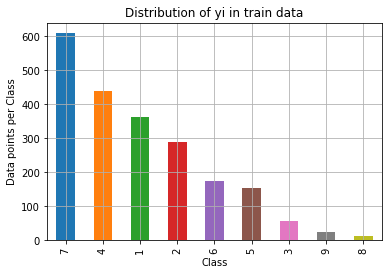

Number of data points in class 1 : 609 ( 28.672 %)
Number of data points in class 2 : 439 ( 20.669 %)
Number of data points in class 3 : 363 ( 17.09 %)
Number of data points in class 4 : 289 ( 13.606 %)
Number of data points in class 5 : 176 ( 8.286 %)
Number of data points in class 6 : 155 ( 7.298 %)
Number of data points in class 7 : 57 ( 2.684 %)
Number of data points in class 8 : 24 ( 1.13 %)
Number of data points in class 9 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


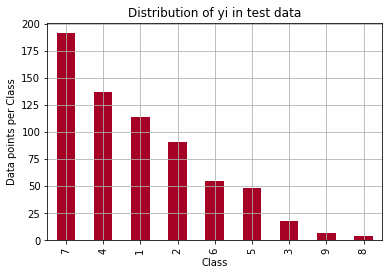

Number of data points in class 1 : 191 ( 28.722 %)
Number of data points in class 2 : 137 ( 20.602 %)
Number of data points in class 3 : 114 ( 17.143 %)
Number of data points in class 4 : 91 ( 13.684 %)
Number of data points in class 5 : 55 ( 8.271 %)
Number of data points in class 6 : 48 ( 7.218 %)
Number of data points in class 7 : 18 ( 2.707 %)
Number of data points in class 8 : 7 ( 1.053 %)
Number of data points in class 9 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


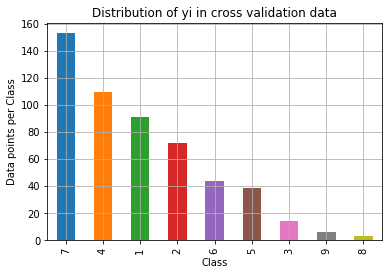

Number of data points in class 1 : 153 ( 28.759 %)
Number of data points in class 2 : 110 ( 20.677 %)
Number of data points in class 3 : 91 ( 17.105 %)
Number of data points in class 4 : 72 ( 13.534 %)
Number of data points in class 5 : 44 ( 8.271 %)
Number of data points in class 6 : 39 ( 7.331 %)
Number of data points in class 7 : 14 ( 2.632 %)
Number of data points in class 8 : 6 ( 1.128 %)
Number of data points in class 9 : 3 ( 0.564 %)


In [14]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts()
test_class_distribution = test_df['Class'].value_counts()
cv_class_distribution = cv_df['Class'].value_counts()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar',colormap="RdYlBu")
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [65]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4305284079036946
Log loss on Test Data using Random Model 2.4809974988604204
-------------------- Confusion matrix --------------------


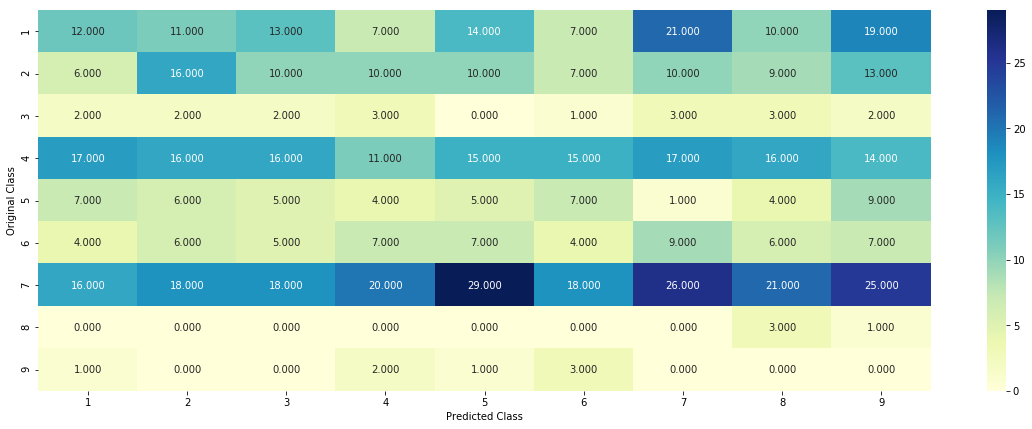

-------------------- Precision matrix (Columm Sum=1) --------------------


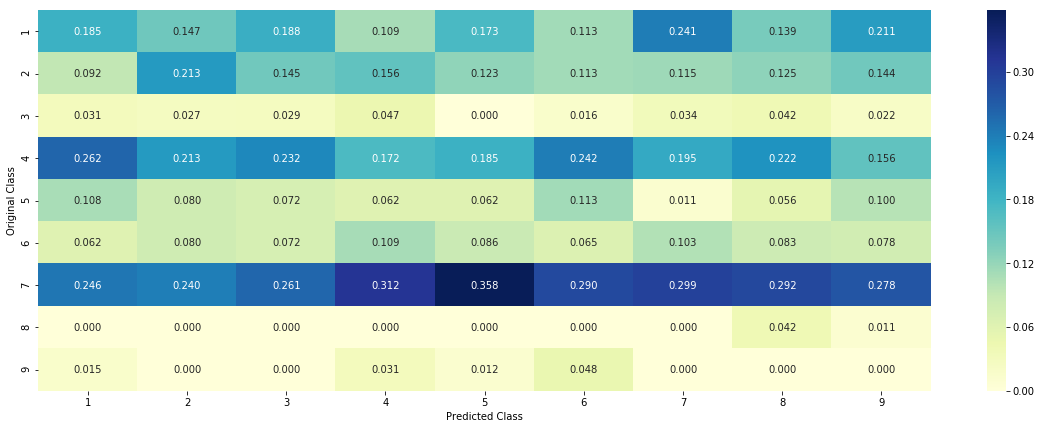

-------------------- Recall matrix (Row sum=1) --------------------


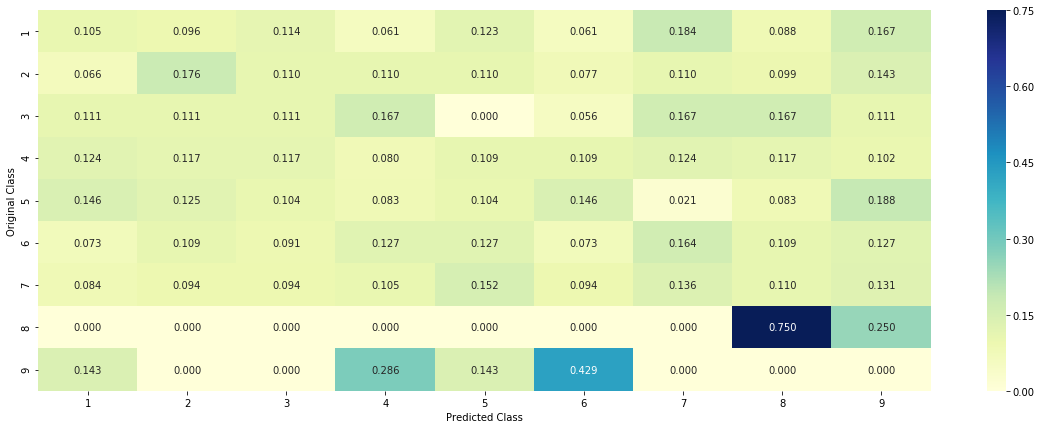

In [16]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [17]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 dimensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [18]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 235
BRCA1     170
TP53      106
EGFR       89
PTEN       79
BRCA2      79
BRAF       61
KIT        52
ERBB2      48
ALK        43
PDGFRA     40
Name: Gene, dtype: int64


In [19]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 235 different categories of genes in the train data, and they are distibuted as follows


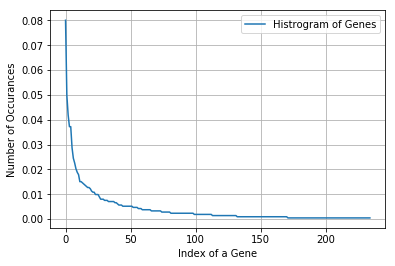

In [20]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


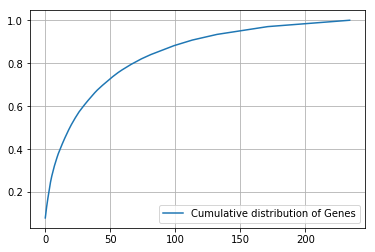

In [21]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [22]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [23]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [24]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer(max_features=1000,use_idf=False,norm=None)
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [25]:
train_df['Gene'].head()

432      TP53
2074     TET2
2785    BRCA2
1315     MLH1
2831    BRCA2
Name: Gene, dtype: object

In [26]:
print('Dimension of gene feature with one hot encoding:', train_gene_feature_onehotCoding.shape[1])
print('Maximum number of features considered for TFIDF:',len(gene_vectorizer.get_feature_names()))
print('Few of the gene features for one hot encoding:', gene_vectorizer.get_feature_names()[:25])

Dimension of gene feature with one hot encoding: 235
Maximum number of features considered for TFIDF: 235
Few of the gene features for one hot encoding: ['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf', 'arid1b', 'arid2', 'arid5b', 'asxl1', 'asxl2', 'atm', 'atr', 'aurka', 'axin1', 'axl', 'b2m', 'bap1', 'bard1', 'bcl10', 'bcl2l11']


In [27]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 235)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.190507581457131
For values of alpha =  0.0001 The log loss is: 1.1642383961066267
For values of alpha =  0.001 The log loss is: 1.2111083704508103
For values of alpha =  0.01 The log loss is: 1.3344471992584148
For values of alpha =  0.1 The log loss is: 1.441158522347992
For values of alpha =  1 The log loss is: 1.480265729726546


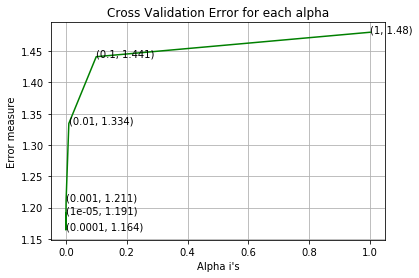

For values of best alpha =  0.0001 The train log loss is: 1.009596852338426
For values of best alpha =  0.0001 The cross validation log loss is: 1.1642383961066267
For values of best alpha =  0.0001 The test log loss is: 1.159173886616681


In [28]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [29]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  235  genes in train dataset?
Ans
1. In test data 639 out of 665 : 96.09022556390977
2. In cross validation data 519 out of  532 : 97.55639097744361


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [30]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1929
Truncating_Mutations    58
Deletion                49
Amplification           46
Fusions                 23
Q61R                     3
Overexpression           3
G12D                     2
E330K                    2
K117N                    2
E17K                     2
Name: Variation, dtype: int64


In [31]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1929 different categories of variations in the train data, and they are distibuted as follows


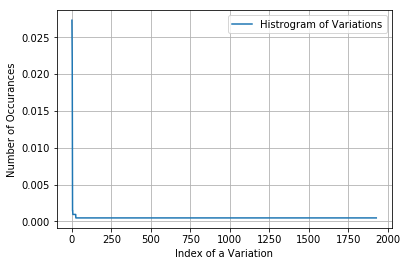

In [32]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02730697 0.05037665 0.0720339  ... 0.99905838 0.99952919 1.        ]


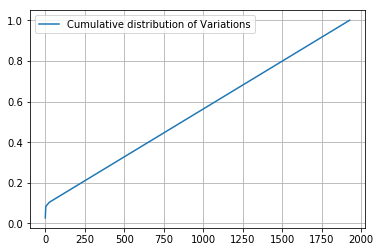

In [33]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [34]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [35]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [36]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer(max_features=1000,binary=True,use_idf=False,norm = False)
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [37]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1000)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.730690067795218
For values of alpha =  0.0001 The log loss is: 1.728264934092632
For values of alpha =  0.001 The log loss is: 1.729652055583629
For values of alpha =  0.01 The log loss is: 1.7355202074250273
For values of alpha =  0.1 The log loss is: 1.7460921091689876
For values of alpha =  1 The log loss is: 1.746914582586935


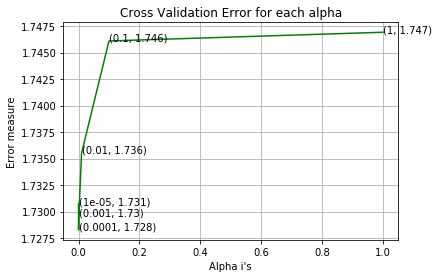

For values of best alpha =  0.0001 The train log loss is: 1.187754778331037
For values of best alpha =  0.0001 The cross validation log loss is: 1.728264934092632
For values of best alpha =  0.0001 The test log loss is: 1.6882453066871204


In [38]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [39]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1929  genes in test and cross validation data sets?
Ans
1. In test data 71 out of 665 : 10.676691729323307
2. In cross validation data 52 out of  532 : 9.774436090225564


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [40]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [41]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [42]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(max_features= 1000,max_df= 5)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
print('Few of the Text features:',train_text_features[:20],'\n')
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Few of the Text features: ['03084014', '0879', '0896', '1034', '11248', '1226deltg', '130b', '1706a', '1708e', '184352', '185stop', '291wi', '2og', '3127', '34g', '34g4a', '393p', '4316c', '4538c', '48a'] 

Total number of unique words in train data : 1000


In [43]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [44]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [45]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [46]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [47]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: int(x[1]) , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [48]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({1.0: 22, 2.0: 9, 4.0: 6, 3.0: 4, 0.5248360143642644: 4, 1.8030278910193545: 3, 0.8174468566745983: 3, 2.107688554851418: 2, 2.0363424515427053: 2, 2.010075630518424: 2, 2.1985587162728066: 2, 2.3451292973576607: 2, 1.5396048062680325: 2, 1.881441736767195: 2, 1.894670850113242: 2, 1.7708202665442323: 2, 1.1679878353802384: 2, 1.4142135623730951: 2, 0.4413830672102621: 2, 0.4066911056762792: 2, 0.6742478040745307: 2, 0.3017002339225058: 2, 0.6681942642534019: 2, 0.5667947484771862: 2, 0.7482257227783758: 2, 0.34430080846510835: 2, 5.0: 1, 4.233243907726188: 1, 4.042515130702302: 1, 4.615707248574805: 1, 4.995037190209989: 1, 4.012250667172323: 1, 4.555379901783846: 1, 4.070757427129227: 1, 4.011878153637124: 1, 4.905288973112412: 1, 4.071031354999886: 1, 3.2361635585216826: 1, 3.7911465158821733: 1, 3.243063102149229: 1, 3.9904551381441244: 1, 3.716082780617938: 1, 3.328201177351375: 1, 3.1206390378448825: 1, 3.426886400414569: 1, 3.408980246934902: 1, 3.9117231429176864: 1, 3.

For values of alpha =  1e-05 The log loss is: 1.6003009341947914
For values of alpha =  0.0001 The log loss is: 1.6041053548144424
For values of alpha =  0.001 The log loss is: 1.6118492485186842
For values of alpha =  0.01 The log loss is: 1.6190080150954638
For values of alpha =  0.1 The log loss is: 1.632331717687353
For values of alpha =  1 The log loss is: 1.6339514329602727
---------------------------------------------------------------------------------------------------------------------


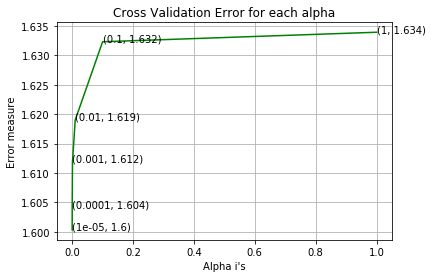

---------------------------------------------------------------------------------------------------------------------
The optimal alpha is:  1e-05 

---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  1e-05 The train log loss is: 1.352440631202818
For values of best alpha =  1e-05 The cross validation log loss is: 1.6003009341947914
For values of best alpha =  1e-05 The test log loss is: 1.62708589188013


In [49]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('-'*117)
print("The optimal alpha is: ", alpha[best_alpha],'\n')
print('-'*117)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [50]:
def get_intersec_text(df):
    df_text_fea = text_vectorizer.transform(df['TEXT'])
    df_text_features = text_vectorizer.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [51]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

100.0 % of word of test data appeared in train data
100.0 % of word of Cross Validation appeared in train data


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes !, 100% of words from test and cross validation data appear in train data  </p>


<h1>4. Machine Learning Models</h1>

In [59]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y_prob = sig_clf.predict_proba(test_x)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, pred_y_prob))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [60]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [61]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer(max_features=1000)
    var_count_vec = TfidfVectorizer(max_features=1000)
    text_count_vec = TfidfVectorizer(min_df=3,max_features=1000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [55]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [56]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 2235)
(number of data points * number of features) in test data =  (665, 2235)
(number of data points * number of features) in cross validation data = (532, 2235)


In [57]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

For alpha = 1e-05 ,Log Loss : 1.3349621051719394
For alpha = 0.0001 ,Log Loss : 1.3332040188192924
For alpha = 0.001 ,Log Loss : 1.3247835285290672
For alpha = 0.1 ,Log Loss : 1.2519856505835747
For alpha = 1 ,Log Loss : 1.1886350022259133
For alpha = 10 ,Log Loss : 1.2698541307545643
For alpha = 100 ,Log Loss : 1.3423242700895426
For alpha = 1000 ,Log Loss : 1.3547451068027914
---------------------------------------------------------------------------------------------------------------------


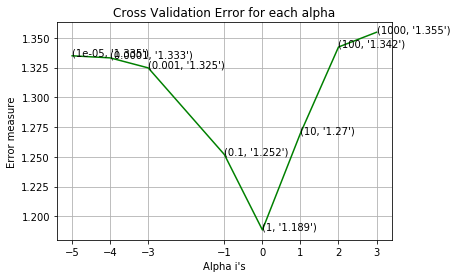

The optimal value of alpha is:  1
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  1 The train log loss is: 0.8485739525533933
For values of best alpha =  1 The cross validation log loss is: 1.1886350022259133
For values of best alpha =  1 The test log loss is: 1.161124507016023
---------------------------------------------------------------------------------------------------------------------


In [58]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha =", i,",Log Loss :",log_loss(cv_y, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('The optimal value of alpha is: ',alpha[best_alpha])
print('-'*117)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print('-'*117)

<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.1886350022259133
Number of missclassified point : 0.3966165413533835
-------------------- Confusion matrix --------------------


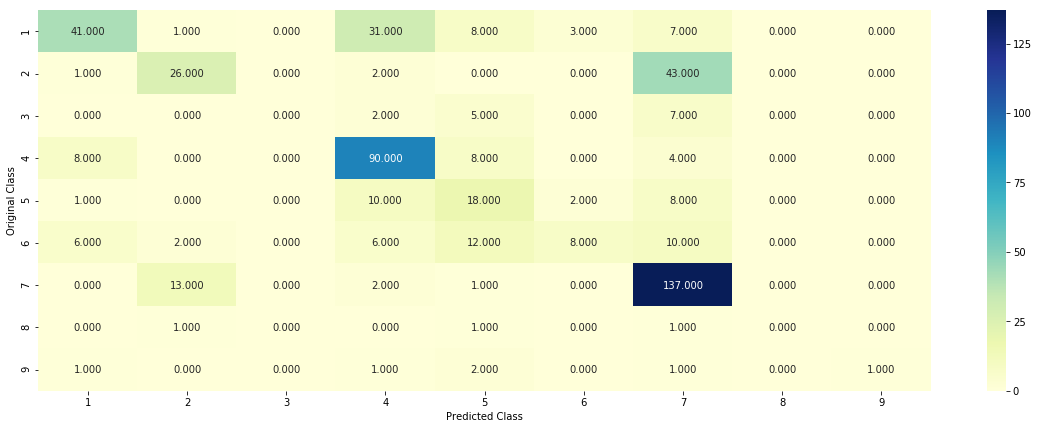

-------------------- Precision matrix (Columm Sum=1) --------------------


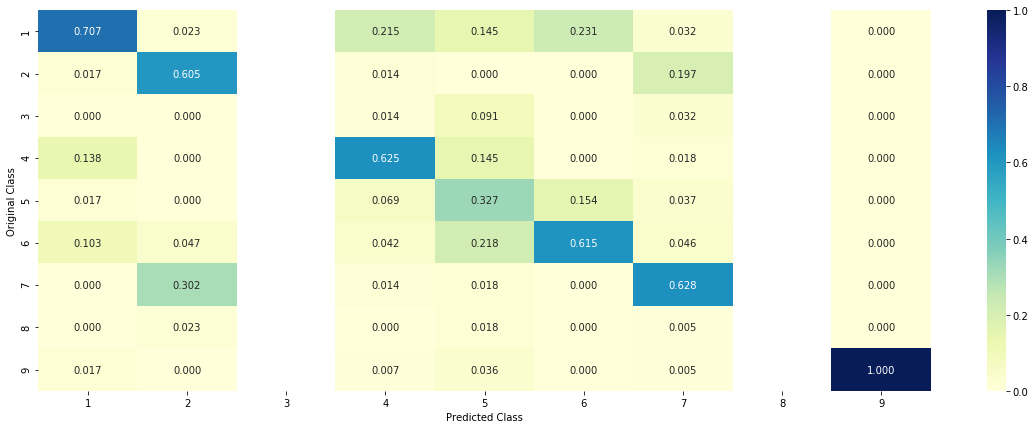

-------------------- Recall matrix (Row sum=1) --------------------


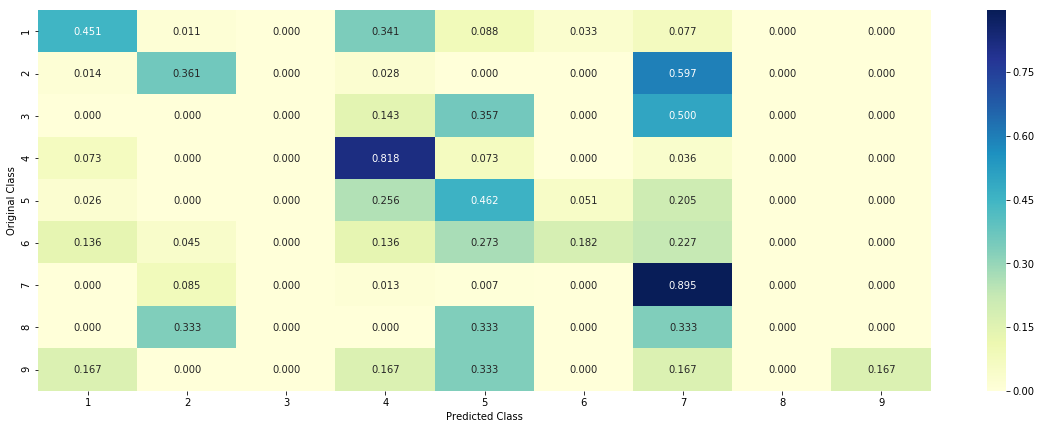

In [59]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [60]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0323 0.5129 0.0141 0.0307 0.0224 0.0294 0.3524 0.0031 0.0027]]
Actual Class : 7
--------------------------------------------------
34 Text feature [size] present in test data point [True]
39 Text feature [sufficient] present in test data point [True]
46 Text feature [low] present in test data point [True]
47 Text feature [manuscript] present in test data point [True]
53 Text feature [absence] present in test data point [True]
54 Text feature [play] present in test data point [True]
55 Text feature [www] present in test data point [True]
56 Text feature [basis] present in test data point [True]
58 Text feature [breast] present in test data point [True]
60 Text feature [conditions] present in test data point [True]
61 Text feature [51] present in test data point [True]
63 Text feature [unknown] present in test data point [True]
64 Text feature [seen] present in test data point [True]
65 Text feature [sequence] present in test data po

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [61]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0436 0.113  0.017  0.0416 0.1015 0.036  0.6406 0.0034 0.0032]]
Actual Class : 7
--------------------------------------------------
62 Text feature [reports] present in test data point [True]
64 Text feature [greater] present in test data point [True]
65 Text feature [tumor] present in test data point [True]
66 Text feature [akt] present in test data point [True]
67 Text feature [formation] present in test data point [True]
69 Text feature [reported] present in test data point [True]
70 Text feature [construct] present in test data point [True]
71 Text feature [25] present in test data point [True]
72 Text feature [consequences] present in test data point [True]
78 Text feature [transfected] present in test data point [True]
Out of the top  100  features  10 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

For alpha =  5 Log Loss : 1.0403867591957958
For alpha =  11 Log Loss : 1.032802604688044
For alpha =  15 Log Loss : 1.0417665967450598
For alpha =  21 Log Loss : 1.0508433477527706
For alpha =  31 Log Loss : 1.0496343990613117
For alpha =  41 Log Loss : 1.0584337134815986
For alpha =  51 Log Loss : 1.0714159619219643
For alpha =  99 Log Loss : 1.1135184643852003
---------------------------------------------------------------------------------------------------------------------


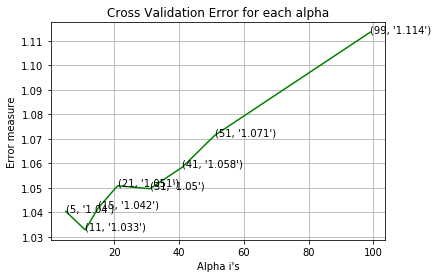

Optimal value of alpha is = 11
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  11 The train log loss is: 0.6605115482534129
For values of best alpha =  11 The cross validation log loss is: 1.032802604688044
For values of best alpha =  11 The test log loss is: 1.0439253057570366


In [62]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is =', alpha[best_alpha])
print('-'*117)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.032802604688044
Number of mis-classified points : 0.35714285714285715
-------------------- Confusion matrix --------------------


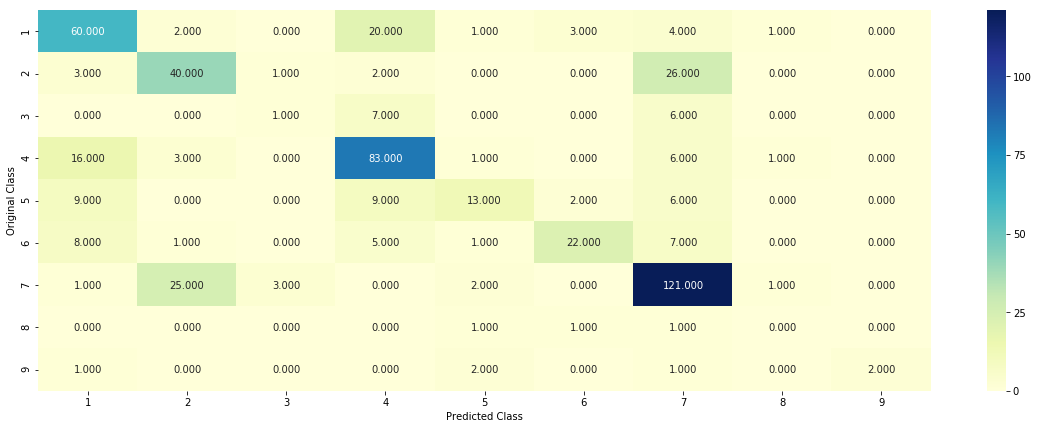

-------------------- Precision matrix (Columm Sum=1) --------------------


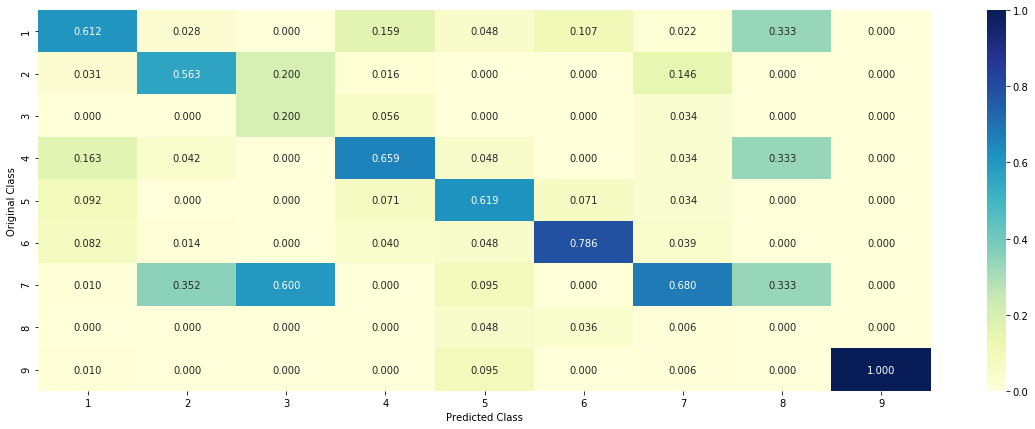

-------------------- Recall matrix (Row sum=1) --------------------


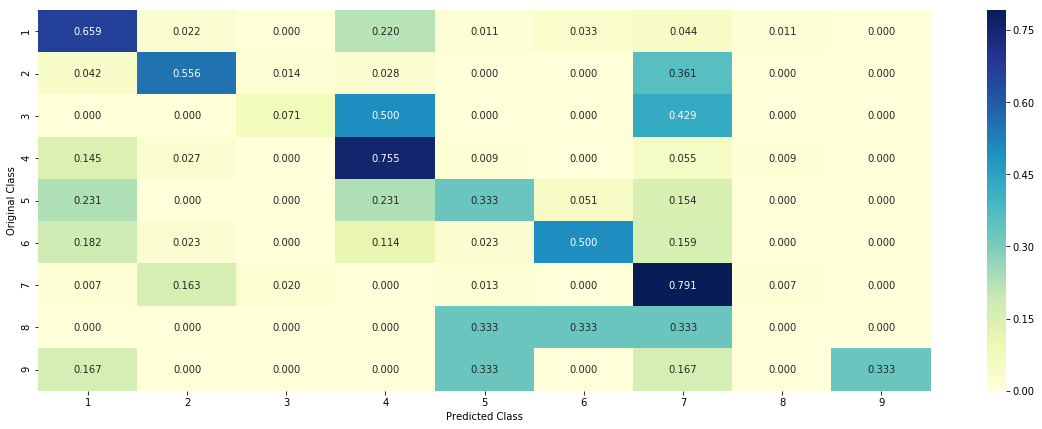

In [63]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [64]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 7
The  11  nearest neighbours of the test points belongs to classes [7 7 2 7 7 7 7 2 2 7 7]
Fequency of nearest points : Counter({7: 8, 2: 3})


<h3>4.2.4. Sample Query Point-2 </h3>

In [65]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [5 2 7 7 7 5 2 5 7 7 5]
Fequency of nearest points : Counter({7: 5, 5: 4, 2: 2})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

For alpha =  1e-06 Log Loss : 1.353479582012749
For alpha =  1e-05 Log Loss : 1.145885481396139
For alpha =  0.0001 Log Loss : 1.1035434981318655
For alpha =  0.001 Log Loss : 1.1410083566307472
For alpha =  0.01 Log Loss : 1.2535093006218758
For alpha =  0.1 Log Loss : 1.3803979158921906
For alpha =  1 Log Loss : 1.4289618386131264
For alpha =  10 Log Loss : 1.4361123029448293
For alpha =  100 Log Loss : 1.4370038606041944
---------------------------------------------------------------------------------------------------------------------


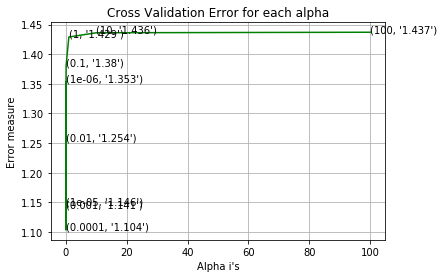

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.632677689315176
For values of best alpha =  0.0001 The cross validation log loss is: 1.1035434981318655
For values of best alpha =  0.0001 The test log loss is: 1.0510180230950894


In [66]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1035434981318655
Number of mis-classified points : 0.39473684210526316
-------------------- Confusion matrix --------------------


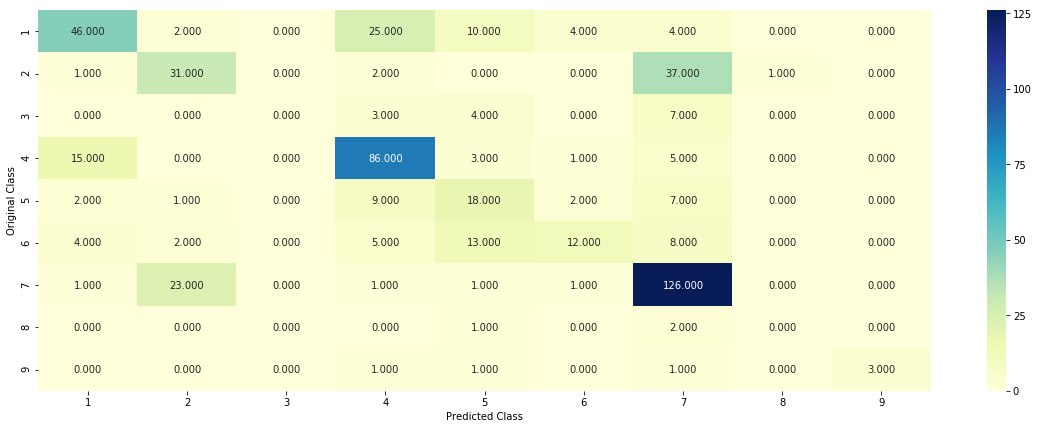

-------------------- Precision matrix (Columm Sum=1) --------------------


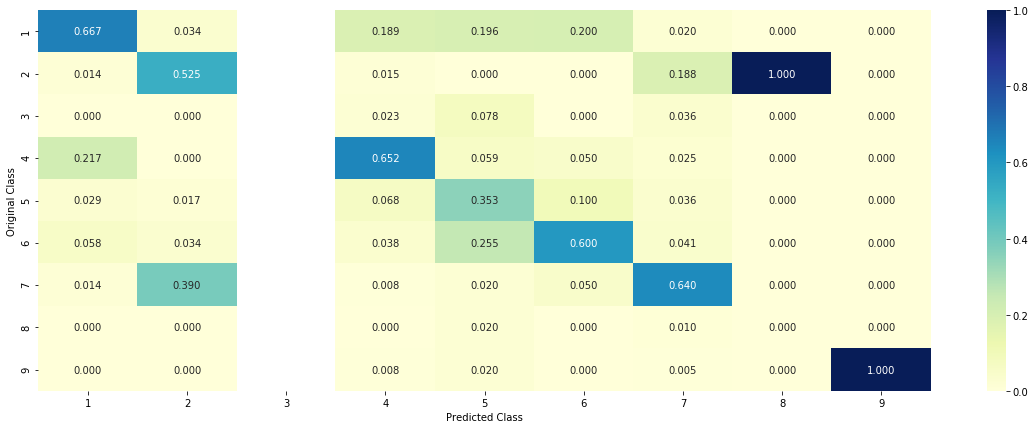

-------------------- Recall matrix (Row sum=1) --------------------


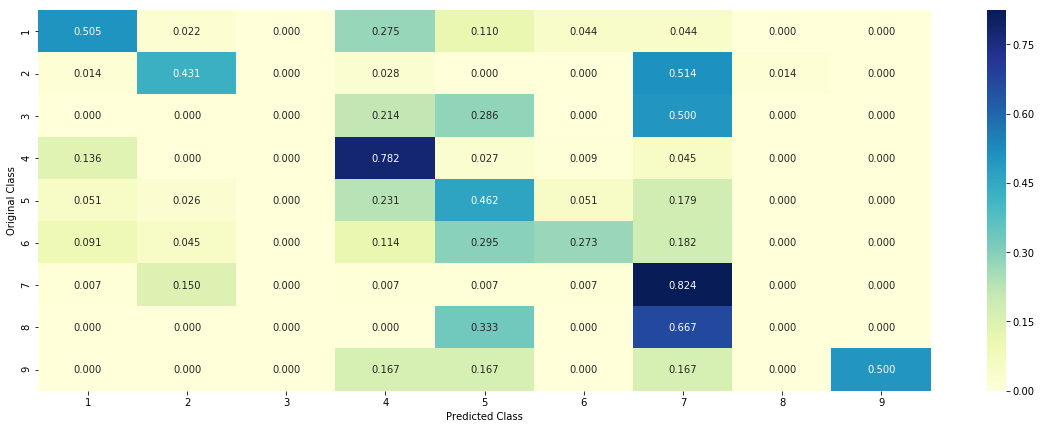

In [67]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [68]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0089 0.2252 0.0052 0.0113 0.0088 0.0097 0.7266 0.0029 0.0013]]
Actual Class : 7
--------------------------------------------------
10 Text feature [induced] present in test data point [True]
26 Text feature [frequency] present in test data point [True]
30 Text feature [individuals] present in test data point [True]
32 Text feature [inhibitory] present in test data point [True]
33 Text feature [growth] present in test data point [True]
37 Text feature [cdna] present in test data point [True]
43 Text feature [antibodies] present in test data point [True]
47 Text feature [class] present in test data point [True]
50 Text feature [four] present in test data point [True]
51 Text feature [invitrogen] present in test data point [True]
53 Text feature [developed] present in test data point [True]
54 Text feature [case] present in test data point [True]
62 Text feature [models] present in test data point [True]
67 Text feature [32] present i

<h5>4.3.1.3.2. Correctly Classified point</h5>

In [69]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0241 0.1405 0.0079 0.0216 0.2654 0.0111 0.5235 0.0038 0.0021]]
Actual Class : 7
--------------------------------------------------
10 Text feature [induced] present in test data point [True]
26 Text feature [frequency] present in test data point [True]
32 Text feature [inhibitory] present in test data point [True]
33 Text feature [growth] present in test data point [True]
37 Text feature [cdna] present in test data point [True]
43 Text feature [antibodies] present in test data point [True]
47 Text feature [class] present in test data point [True]
50 Text feature [four] present in test data point [True]
51 Text feature [invitrogen] present in test data point [True]
53 Text feature [developed] present in test data point [True]
54 Text feature [case] present in test data point [True]
57 Text feature [construct] present in test data point [True]
62 Text feature [models] present in test data point [True]
67 Text feature [32] present in 

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

For alpha: 1e-06 Log Loss : 1.3873164492767271
For alpha: 1e-05 Log Loss : 1.1640714494848956
For alpha: 0.0001 Log Loss : 1.1057835697096183
For alpha: 0.001 Log Loss : 1.135184675884514
For alpha: 0.01 Log Loss : 1.2510138273008473
For alpha: 0.1 Log Loss : 1.3498859521523308
For alpha: 1 Log Loss : 1.3910420331708768
---------------------------------------------------------------------------------------------------------------------


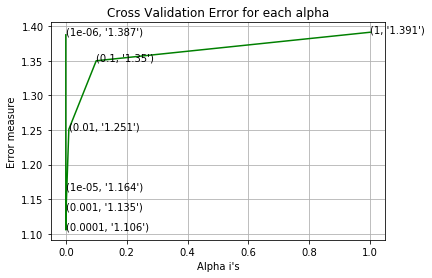

Optimal value of alpha is: 0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.6224764763472803
For values of best alpha =  0.0001 The cross validation log loss is: 1.1057835697096183
For values of best alpha =  0.0001 The test log loss is: 1.0559634561841698


In [70]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("For alpha:",i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is:', alpha[best_alpha])
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
print('-'*117)
predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1057835697096183
Number of mis-classified points : 0.39285714285714285
-------------------- Confusion matrix --------------------


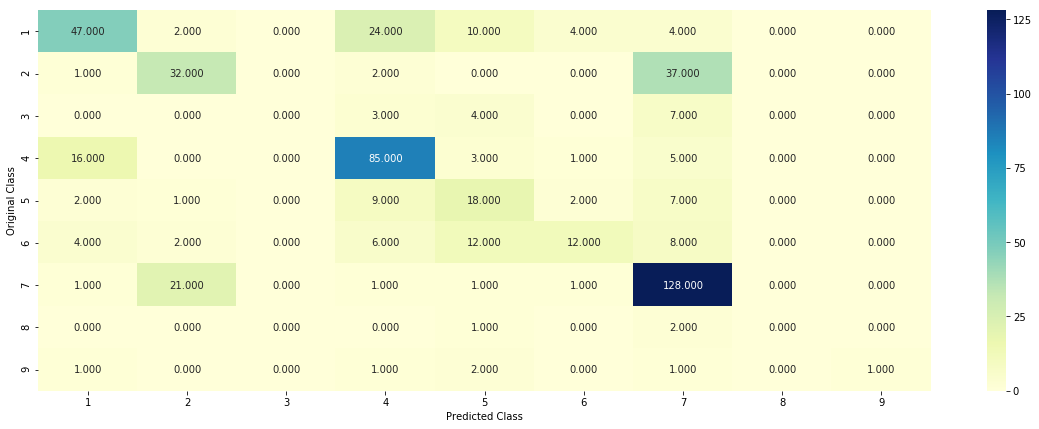

-------------------- Precision matrix (Columm Sum=1) --------------------


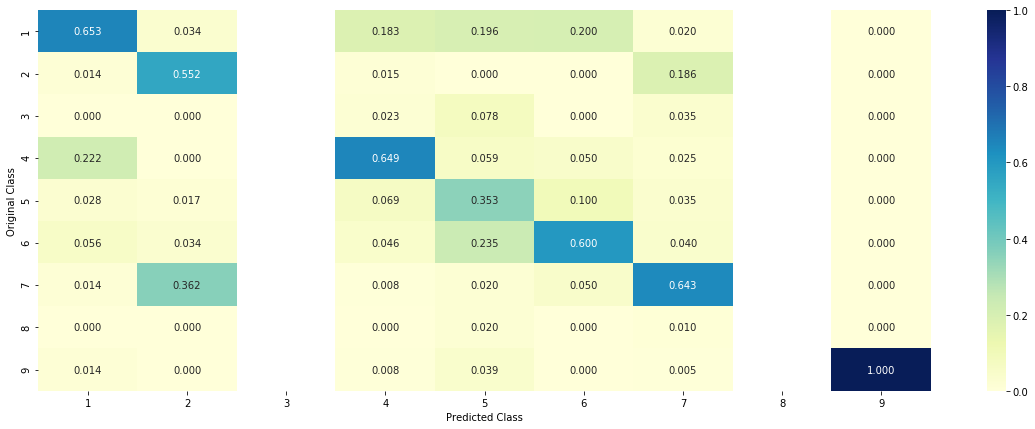

-------------------- Recall matrix (Row sum=1) --------------------


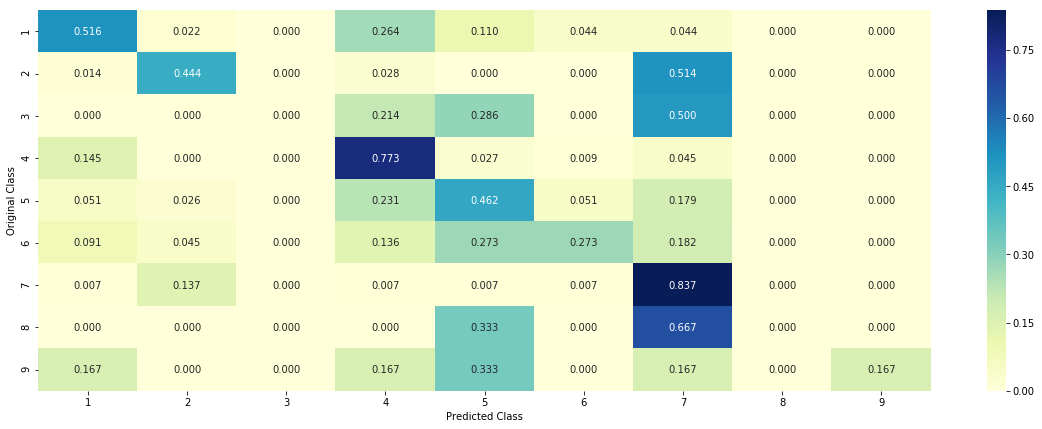

In [71]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [72]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0088 0.2073 0.0047 0.0107 0.0083 0.0094 0.7482 0.0017 0.0009]]
Actual Class : 7
--------------------------------------------------
5 Text feature [induced] present in test data point [True]
22 Text feature [inhibitory] present in test data point [True]
27 Text feature [cdna] present in test data point [True]
28 Text feature [individuals] present in test data point [True]
31 Text feature [growth] present in test data point [True]
34 Text feature [frequency] present in test data point [True]
37 Text feature [class] present in test data point [True]
40 Text feature [developed] present in test data point [True]
42 Text feature [antibodies] present in test data point [True]
50 Text feature [gel] present in test data point [True]
55 Text feature [case] present in test data point [True]
56 Text feature [invitrogen] present in test data point [True]
61 Text feature [discussion] present in test data point [True]
62 Text feature [syndrome] p

<h4>4.3.2.4. Feature Importance, Correctly Classified point</h4>

In [73]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0239 0.143  0.0083 0.0201 0.2555 0.0118 0.5323 0.003  0.0021]]
Actual Class : 7
--------------------------------------------------
5 Text feature [induced] present in test data point [True]
22 Text feature [inhibitory] present in test data point [True]
27 Text feature [cdna] present in test data point [True]
31 Text feature [growth] present in test data point [True]
34 Text feature [frequency] present in test data point [True]
37 Text feature [class] present in test data point [True]
40 Text feature [developed] present in test data point [True]
42 Text feature [antibodies] present in test data point [True]
50 Text feature [gel] present in test data point [True]
55 Text feature [case] present in test data point [True]
56 Text feature [invitrogen] present in test data point [True]
61 Text feature [discussion] present in test data point [True]
64 Text feature [il] present in test data point [True]
65 Text feature [type] present in tes

414 Text feature [kras] present in test data point [True]
415 Text feature [required] present in test data point [True]
416 Text feature [iii] present in test data point [True]
417 Text feature [mm] present in test data point [True]
418 Text feature [model] present in test data point [True]
427 Text feature [compared] present in test data point [True]
428 Text feature [23] present in test data point [True]
434 Text feature [non] present in test data point [True]
436 Text feature [subset] present in test data point [True]
447 Text feature [left] present in test data point [True]
449 Text feature [sporadic] present in test data point [True]
452 Text feature [groups] present in test data point [True]
454 Text feature [normalized] present in test data point [True]
455 Text feature [inhibitors] present in test data point [True]
458 Text feature [vector] present in test data point [True]
460 Text feature [example] present in test data point [True]
464 Text feature [genes] present in test dat

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

For C : 1e-05 Log Loss : 1.3119251568362995
For C : 0.0001 Log Loss : 1.316144975611941
For C : 0.001 Log Loss : 1.342232110314887
For C : 0.01 Log Loss : 1.4247491067701326
For C : 0.1 Log Loss : 1.4106743841752671
For C : 1 Log Loss : 1.4372687839117526
For C : 10 Log Loss : 1.4372688637027276
For C : 100 Log Loss : 1.4372687921592577
---------------------------------------------------------------------------------------------------------------------


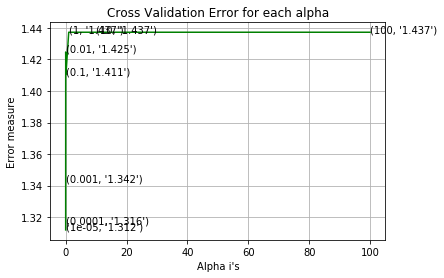

Optimal value of C:  1e-05
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  1e-05 The train log loss is: 0.7958351138871943
For values of best alpha =  1e-05 The cross validation log loss is: 1.3119251568362995
For values of best alpha =  1e-05 The test log loss is: 1.284632993155355


In [74]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("For C :",i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of C: ",alpha[best_alpha])
print('-'*117)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.3119251568362995
Number of mis-classified points : 0.4266917293233083
-------------------- Confusion matrix --------------------


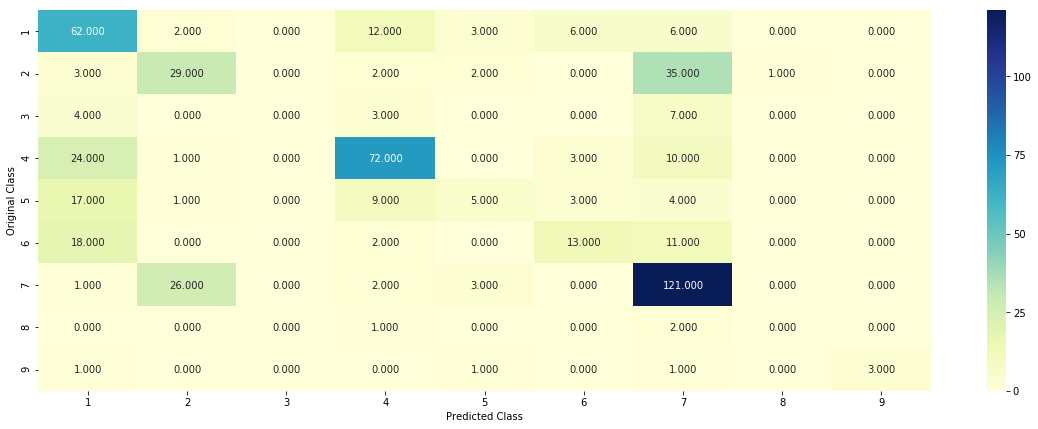

-------------------- Precision matrix (Columm Sum=1) --------------------


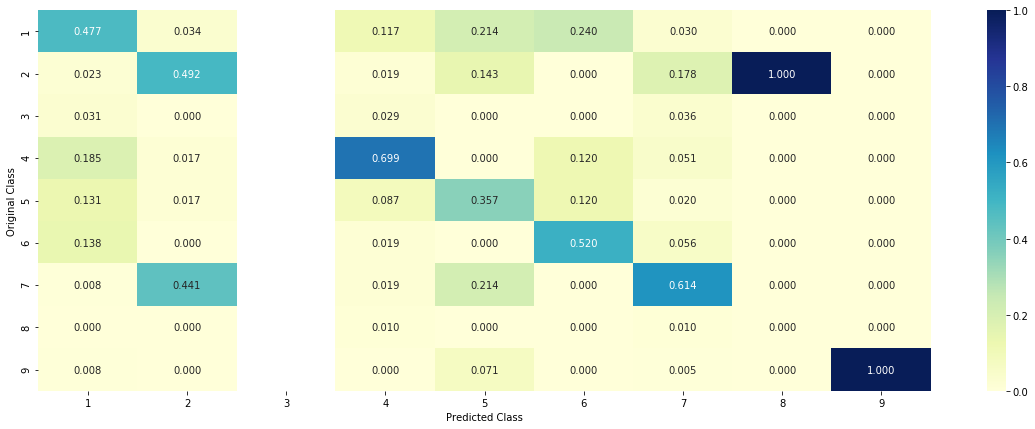

-------------------- Recall matrix (Row sum=1) --------------------


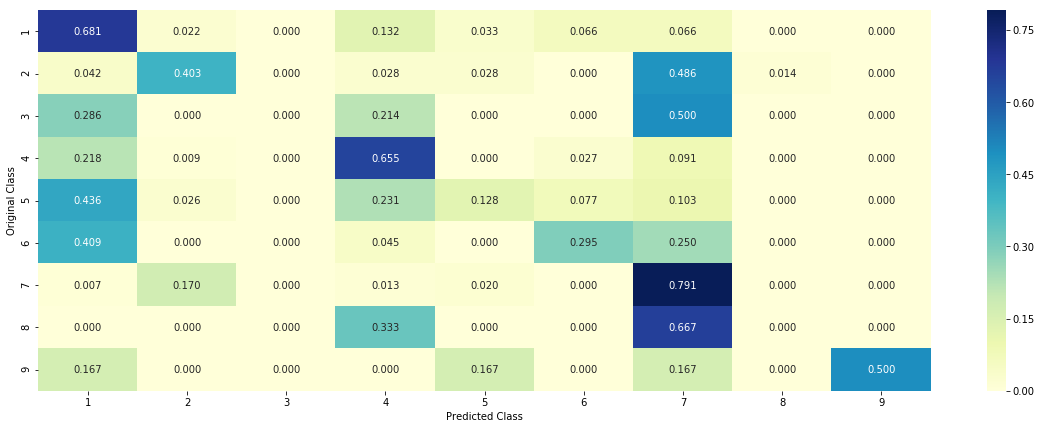

In [75]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [76]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0322 0.1421 0.0149 0.1077 0.0294 0.0204 0.6465 0.0036 0.0032]]
Actual Class : 7
--------------------------------------------------
0 Text feature [data] present in test data point [True]
1 Text feature [class] present in test data point [True]
2 Text feature [identified] present in test data point [True]
6 Text feature [d1] present in test data point [True]
16 Text feature [inhibitory] present in test data point [True]
17 Text feature [example] present in test data point [True]
18 Text feature [developed] present in test data point [True]
20 Text feature [four] present in test data point [True]
21 Text feature [46] present in test data point [True]
22 Text feature [induced] present in test data point [True]
23 Text feature [death] present in test data point [True]
24 Text feature [32] present in test data point [True]
25 Text feature [median] present in test data point [True]
26 Text feature [various] present in test data point [Tr

<h4>4.3.3.2. For Correctly classified point</h4>

In [77]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0975 0.0729 0.0315 0.097  0.1837 0.0393 0.4684 0.0058 0.0038]]
Actual Class : 7
--------------------------------------------------
0 Text feature [data] present in test data point [True]
1 Text feature [class] present in test data point [True]
2 Text feature [identified] present in test data point [True]
16 Text feature [inhibitory] present in test data point [True]
17 Text feature [example] present in test data point [True]
18 Text feature [developed] present in test data point [True]
20 Text feature [four] present in test data point [True]
21 Text feature [46] present in test data point [True]
22 Text feature [induced] present in test data point [True]
23 Text feature [death] present in test data point [True]
24 Text feature [32] present in test data point [True]
26 Text feature [various] present in test data point [True]
27 Text feature [previously] present in test data point [True]
29 Text feature [important] present in test da

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [78]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%2)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.3229602846558577
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.2928051605886395
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.3079647004880568
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.2858215720269404
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.2945998841494741
------------------------------------------------

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.2789795387347374
Number of mis-classified points : 0.45112781954887216
-------------------- Confusion matrix --------------------


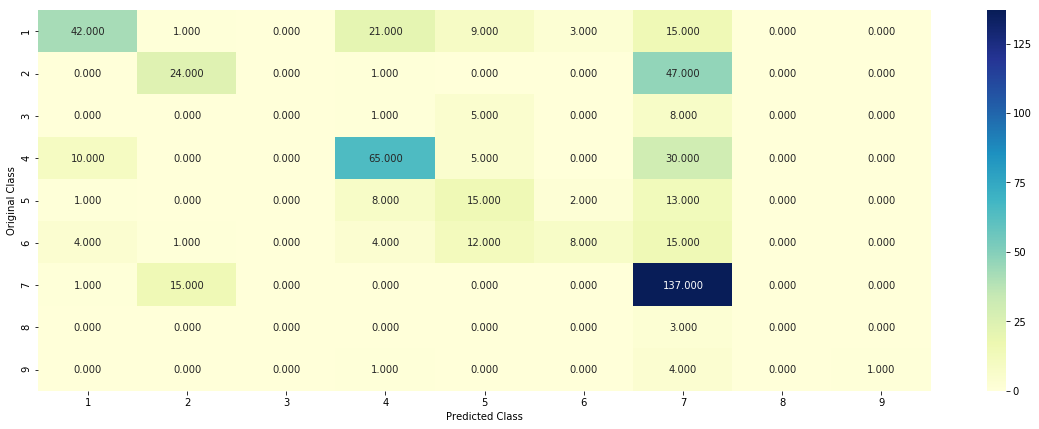

-------------------- Precision matrix (Columm Sum=1) --------------------


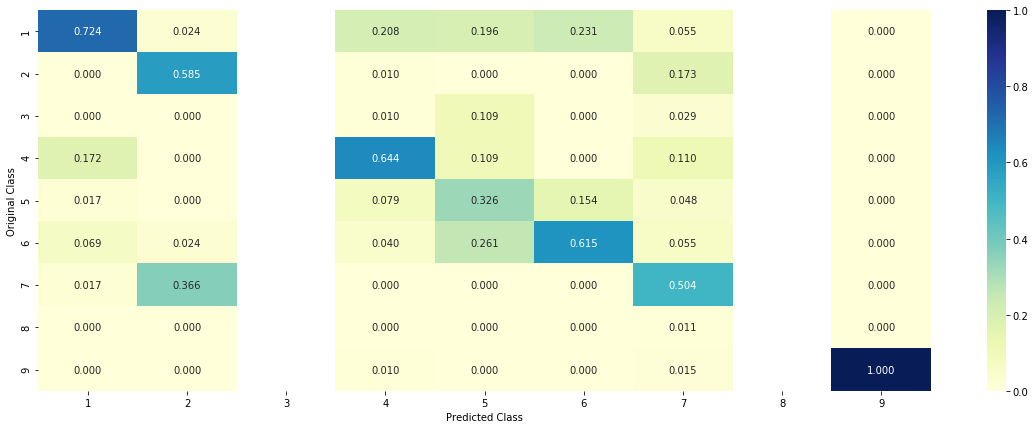

-------------------- Recall matrix (Row sum=1) --------------------


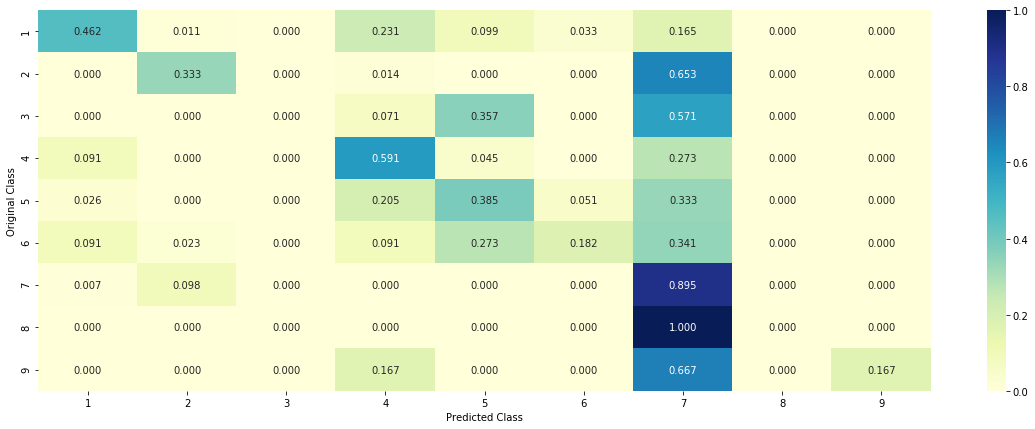

In [79]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [80]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0329 0.3817 0.0108 0.0358 0.023  0.0259 0.4837 0.0032 0.0032]]
Actual Class : 7
--------------------------------------------------
39 Text feature [basis] present in test data point [True]
42 Text feature [first] present in test data point [True]
44 Text feature [whether] present in test data point [True]
45 Text feature [size] present in test data point [True]
49 Text feature [yet] present in test data point [True]
55 Text feature [whereas] present in test data point [True]
58 Text feature [manuscript] present in test data point [True]
60 Text feature [www] present in test data point [True]
61 Text feature [respectively] present in test data point [True]
62 Text feature [low] present in test data point [True]
65 Text feature [least] present in test data point [True]
66 Text feature [sufficient] present in test data point [True]
67 Text feature [end] present in test data point [True]
68 Text feature [absence] present in test data p

<h4>4.5.3.2. Correctly Classified point</h4>

In [81]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0769 0.0961 0.0185 0.0961 0.158  0.046  0.4988 0.0048 0.0049]]
Actuall Class : 7
--------------------------------------------------
39 Text feature [basis] present in test data point [True]
42 Text feature [first] present in test data point [True]
44 Text feature [whether] present in test data point [True]
45 Text feature [size] present in test data point [True]
49 Text feature [yet] present in test data point [True]
50 Text feature [pten] present in test data point [True]
55 Text feature [whereas] present in test data point [True]
60 Text feature [www] present in test data point [True]
61 Text feature [respectively] present in test data point [True]
62 Text feature [low] present in test data point [True]
65 Text feature [least] present in test data point [True]
67 Text feature [end] present in test data point [True]
68 Text feature [absence] present in test data point [True]
69 Text feature [receptor] present in test data point [T

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [82]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
        print('-'*117)
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is: ",alpha[int(best_alpha/4)]," and max depth is: ",max_depth[int(best_alpha%4)])
print('-*117')
                                                                                        
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 10 and max depth =  2
Log Loss : 2.18498100380688
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 10 and max depth =  3
Log Loss : 1.5731394842376383
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 10 and max depth =  5
Log Loss : 1.464368125688025
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 10 and max depth =  10
Log Loss : 1.9457487913327245
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 50 and max depth =  2
Log Loss : 1.765354751932428
----------------------------------------------------------

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.3090271389016201
Number of mis-classified points : 0.5037593984962406
-------------------- Confusion matrix --------------------


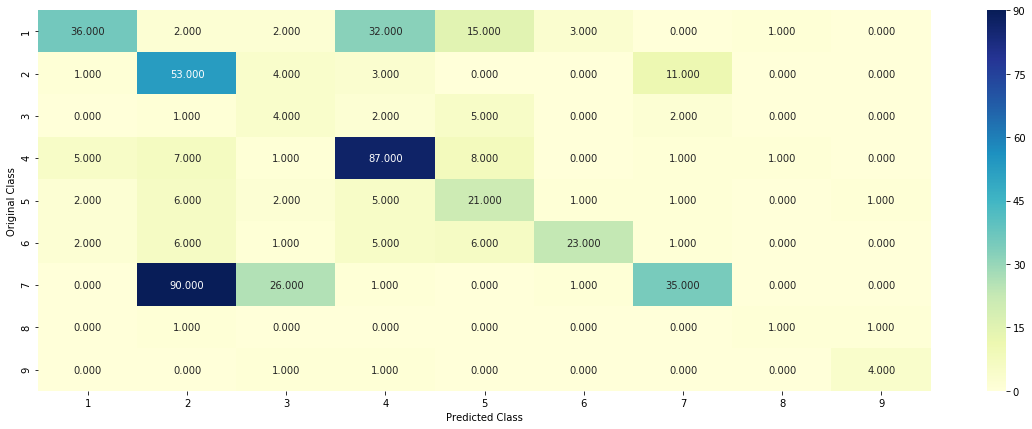

-------------------- Precision matrix (Columm Sum=1) --------------------


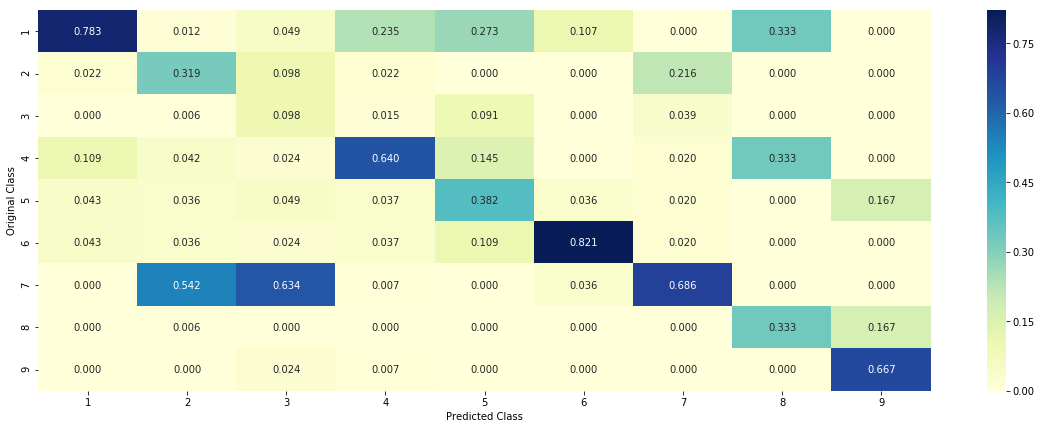

-------------------- Recall matrix (Row sum=1) --------------------


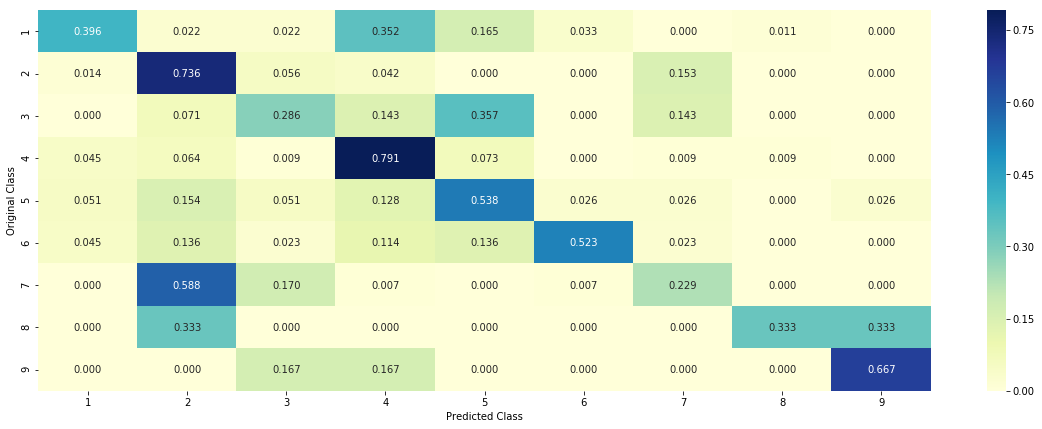

In [83]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [84]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0135 0.5698 0.1131 0.0188 0.0169 0.0393 0.2012 0.0183 0.0092]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [85]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0197 0.3652 0.1636 0.0238 0.0467 0.0491 0.2942 0.0237 0.014 ]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [86]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.14
Support vector machines : Log Loss: 1.44
Naive Bayes : Log Loss: 1.32
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.049
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.582
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.210
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.257
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.424


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.798760713856568
Log loss (CV) on the stacking classifier : 1.2097728657431173
Log loss (test) on the stacking classifier : 1.183688140856593
Number of missclassified point : 0.4195488721804511
-------------------- Confusion matrix --------------------


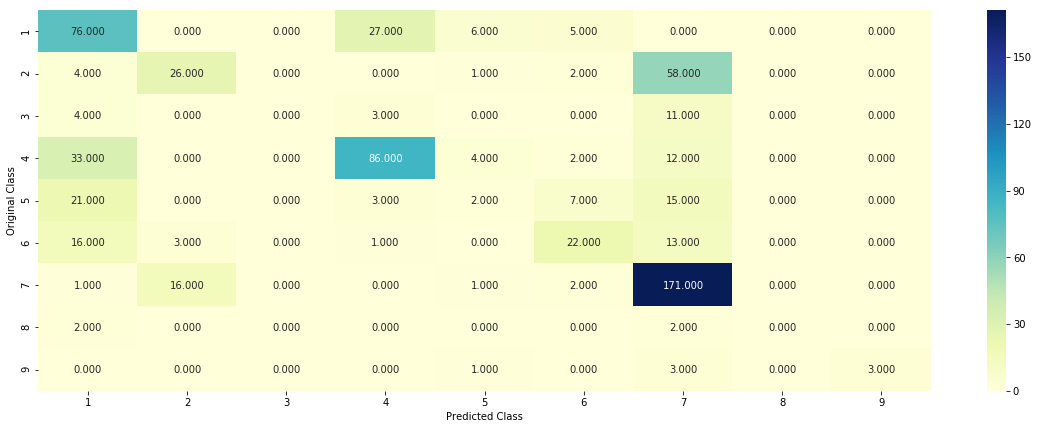

-------------------- Precision matrix (Columm Sum=1) --------------------


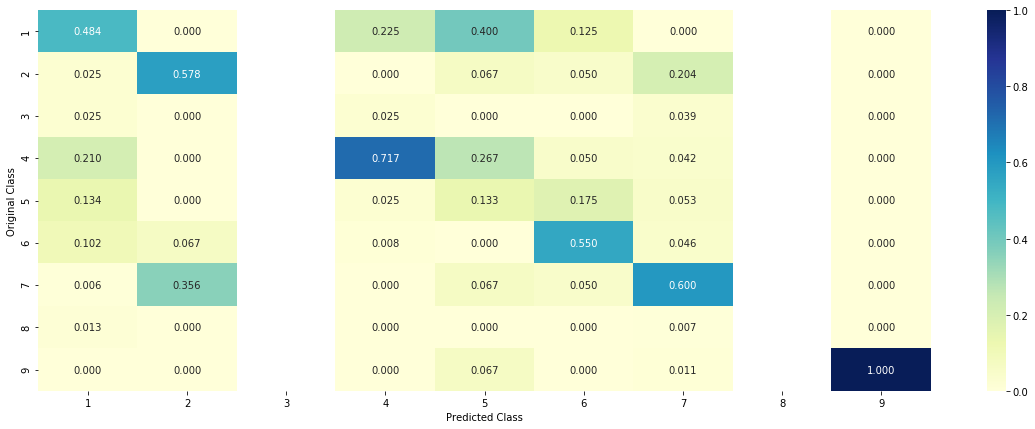

-------------------- Recall matrix (Row sum=1) --------------------


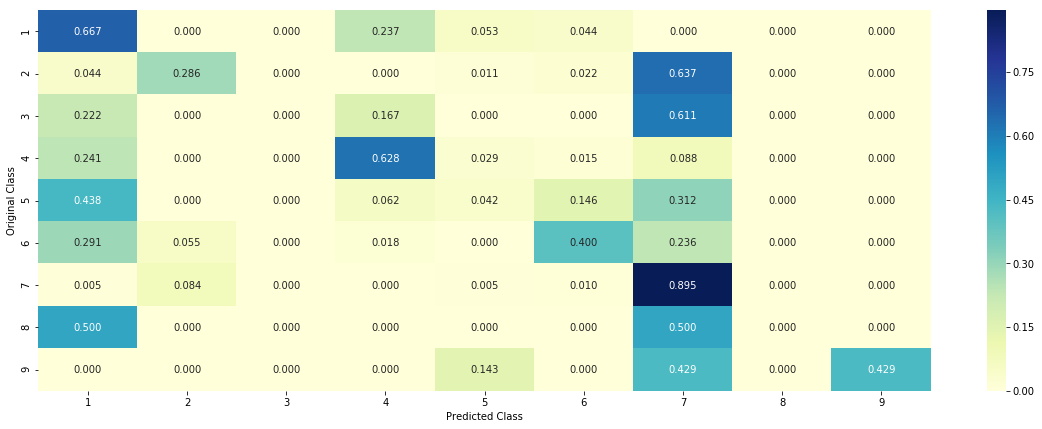

In [87]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.9298115970831516
Log loss (CV) on the VotingClassifier : 1.24499478042257
Log loss (test) on the VotingClassifier : 1.1977236219524432
Number of missclassified point : 0.3954887218045113
-------------------- Confusion matrix --------------------


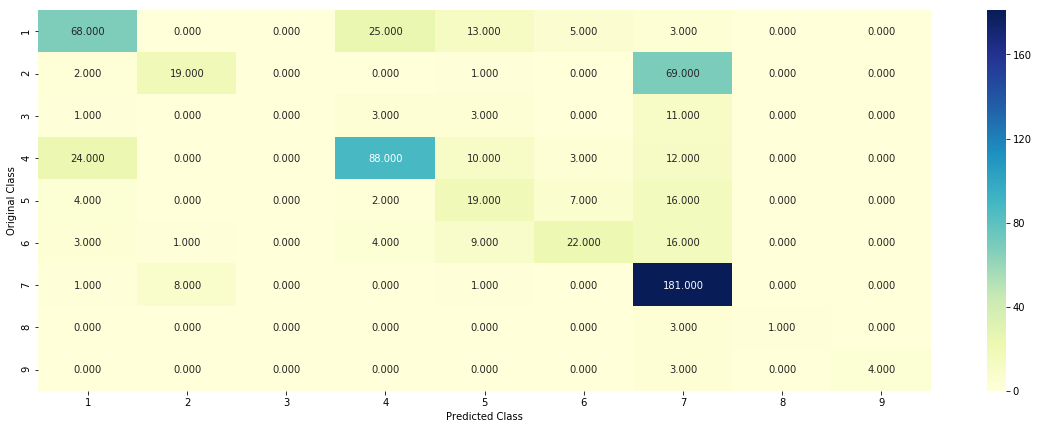

-------------------- Precision matrix (Columm Sum=1) --------------------


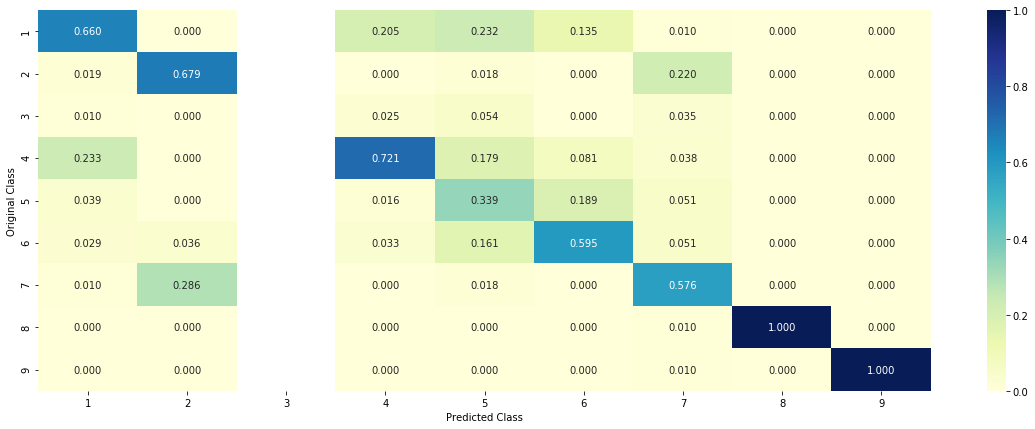

-------------------- Recall matrix (Row sum=1) --------------------


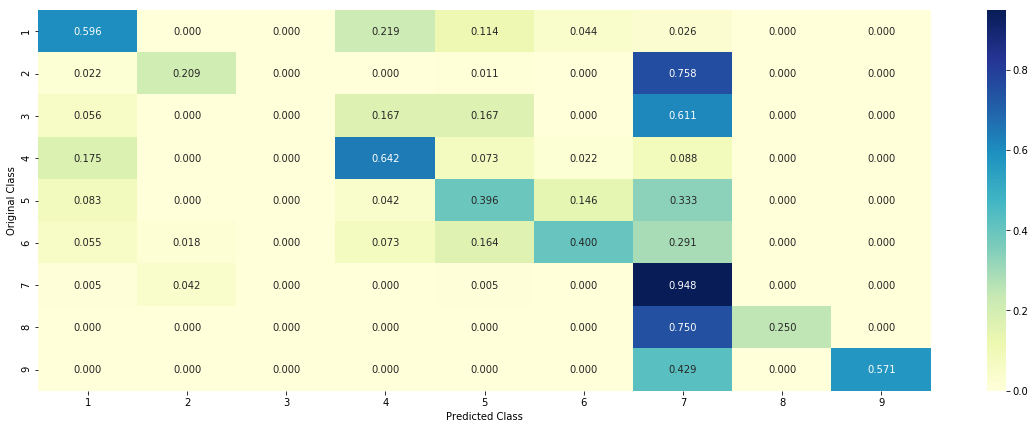

In [88]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('gnb', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

# Logistic Regression with CountVectorizer features with unigram and bigram

In [89]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
variation_vectorizer = CountVectorizer(ngram_range=(1,2))
text_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 5000)

In [90]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])

In [91]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  229
Dimension of varation feature using countvectorizer is:  2063
Dimension of text feature using countvectorizer is:  5000


# Stacking all the Features 

In [92]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer])

In [93]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  7292


In [94]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.2274632489832786
For alpha =  1e-05 Log Loss : 1.176634681580706
For alpha =  0.0001 Log Loss : 1.11319785643397
For alpha =  0.001 Log Loss : 1.1539928119903067
For alpha =  0.01 Log Loss : 1.414161743091011
For alpha =  0.1 Log Loss : 1.8290713193012476
For alpha =  1 Log Loss : 1.8520461849879184
For alpha =  10 Log Loss : 1.8536332134498543
For alpha =  100 Log Loss : 1.8537901997266373
---------------------------------------------------------------------------------------------------------------------


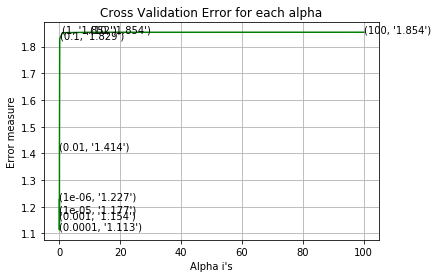

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.47213842586119814
For values of best alpha =  0.0001 The cross validation log loss is: 1.11319785643397
For values of best alpha =  0.0001 The test log loss is: 1.0371926684052486
Log loss : 1.0371926684052486
Number of mis-classified points : 0.36390977443609024
-------------------- Confusion matrix --------------------


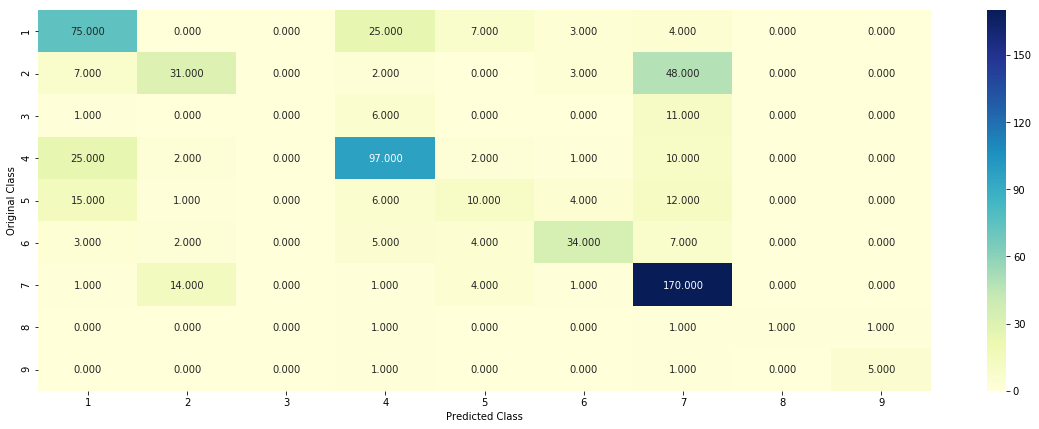

-------------------- Precision matrix (Columm Sum=1) --------------------


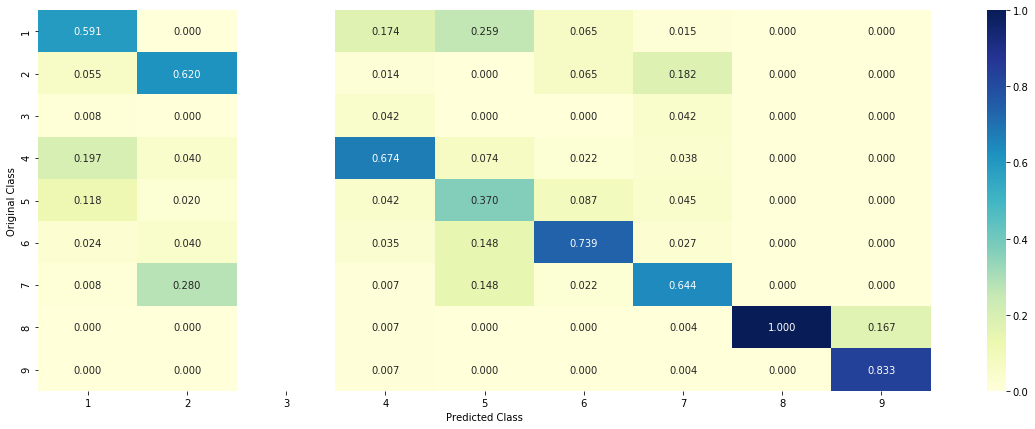

-------------------- Recall matrix (Row sum=1) --------------------


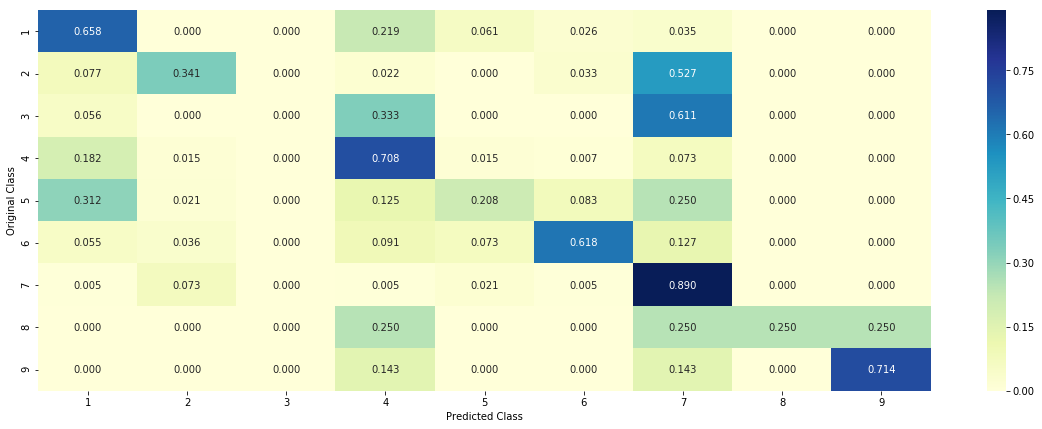

In [95]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [96]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer(ngram_range=(1,2))
    var_count_vec = TfidfVectorizer(ngram_range=(1,2))
    text_count_vec = TfidfVectorizer(ngram_range=(1,2),max_features= 5000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [97]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm,y_train)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_onehotencoding_norm[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_onehotencoding_norm[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.033  0.0204 0.0127 0.0273 0.0839 0.8029 0.0113 0.0053 0.0033]]
Actual Class : 6
--------------------------------------------------
115 Text feature [motifs] present in test data point [True]
125 Text feature [brca] present in test data point [True]
128 Text feature [salt] present in test data point [True]
129 Text feature [trans] present in test data point [True]
131 Text feature [loh] present in test data point [True]
145 Text feature [typically] present in test data point [True]
147 Text feature [ethnic] present in test data point [True]
161 Text feature [histopathology] present in test data point [True]
164 Text feature [makes] present in test data point [True]
165 Text feature [women] present in test data point [True]
183 Text feature [random] present in test data point [True]
196 Text feature [homozygous] present in test data point [True]
198 Text feature [certain] present in test data point [True]
221 Text feature [suspected]

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

# Feature Engineering

#### Observation:
Since Logistic Regression with count vectorizer having 7302 features gave:  
For values of best alpha =  0.0001 The train log loss is: 0.472 
For values of best alpha =  0.0001 The cross validation log loss is: 1.113   
For values of best alpha =  0.0001 The test log loss is: 1.0371  


We see that the model is overfitted, hence lets try to do some feature engineering to reduce the cv and test loss.
Lets Try to model Logistic Regression with count vectorizer with maximum feature for TEXT as 2000 and maximum feature for variation as 200

In [76]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
variation_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=200)
text_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 2000)

In [77]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])

In [78]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  231
Dimension of varation feature using countvectorizer is:  200
Dimension of text feature using countvectorizer is:  2000


# Stacking all the Features 

In [79]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer])

In [80]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  2431


In [81]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.1243081829340982
For alpha =  1e-05 Log Loss : 1.060542080834456
For alpha =  0.0001 Log Loss : 1.018731651562333
For alpha =  0.001 Log Loss : 1.2024195151920558
For alpha =  0.01 Log Loss : 1.6613975139768096
For alpha =  0.1 Log Loss : 1.8615819307649242
For alpha =  1 Log Loss : 1.8690715621688683
For alpha =  10 Log Loss : 1.8697306753762397
For alpha =  100 Log Loss : 1.8697987872014346
---------------------------------------------------------------------------------------------------------------------


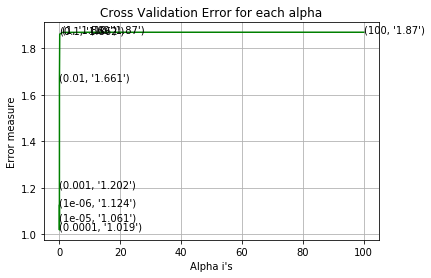

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.701359840158392
For values of best alpha =  0.0001 The cross validation log loss is: 1.018731651562333
For values of best alpha =  0.0001 The test log loss is: 1.0827119513454446
Log loss : 1.0827119513454446
Number of mis-classified points : 0.3533834586466165
-------------------- Confusion matrix --------------------


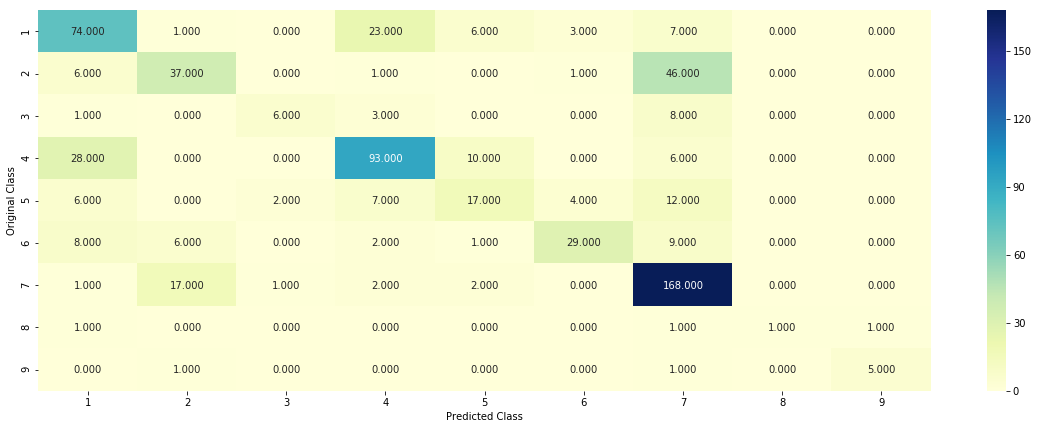

-------------------- Precision matrix (Columm Sum=1) --------------------


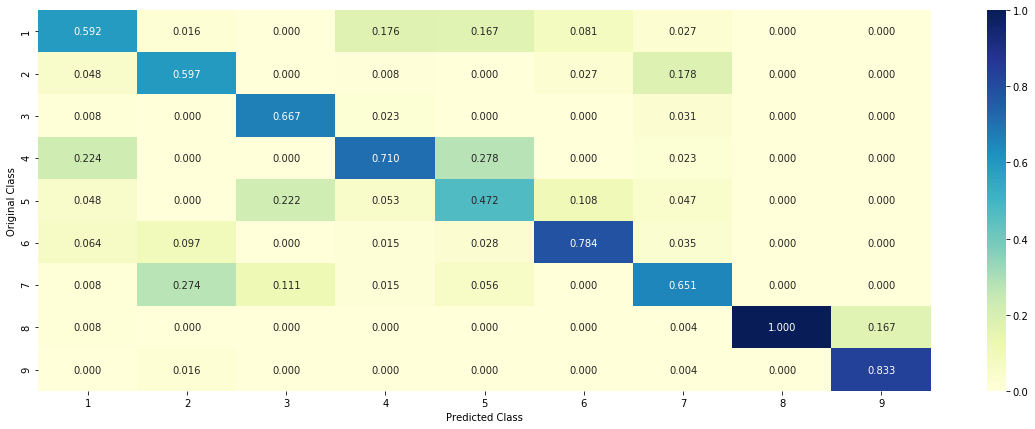

-------------------- Recall matrix (Row sum=1) --------------------


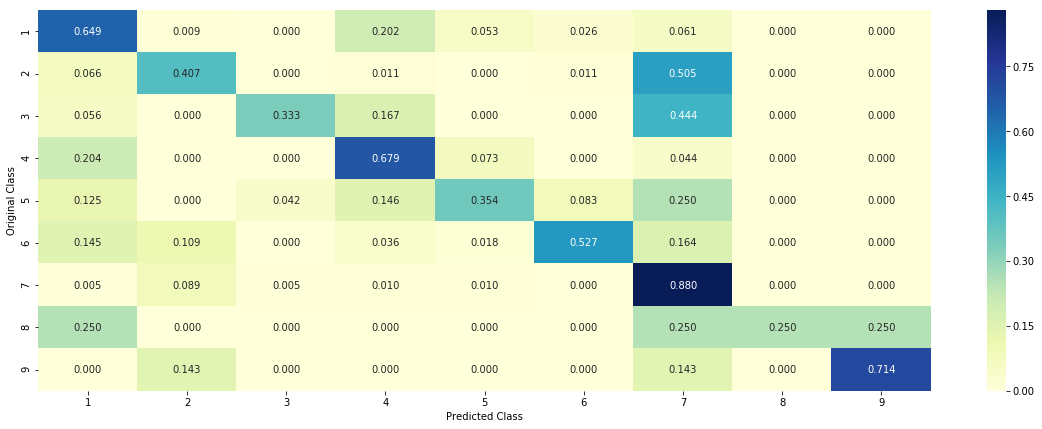

In [82]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

### Lets Further reduce the variation feature to 50 and text feature to 1000 to check for train loss, cv loss and test loss convergence

In [83]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
variation_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 50)
text_vectorizer = CountVectorizer(ngram_range=(1,2),max_features= 1000)

In [84]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])

In [85]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  231
Dimension of varation feature using countvectorizer is:  50
Dimension of text feature using countvectorizer is:  1000


# Stacking all the Features 

In [86]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer])

In [87]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  1281


In [88]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.0921382844287637
For alpha =  1e-05 Log Loss : 1.0055492640843504
For alpha =  0.0001 Log Loss : 1.033880292777621
For alpha =  0.001 Log Loss : 1.2514221568596866
For alpha =  0.01 Log Loss : 1.7382569772559158
For alpha =  0.1 Log Loss : 1.8659763263735278
For alpha =  1 Log Loss : 1.869948494983428
For alpha =  10 Log Loss : 1.8702864671209993
For alpha =  100 Log Loss : 1.870321886773216
---------------------------------------------------------------------------------------------------------------------


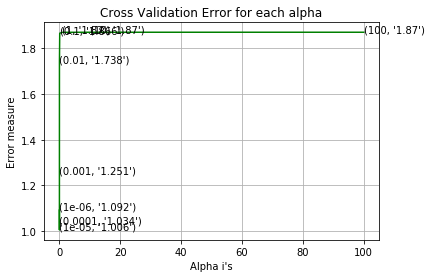

Optimal value of alpha is:  1e-05
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  1e-05 The train log loss is: 0.7096436278834706
For values of best alpha =  1e-05 The cross validation log loss is: 1.0055492640843504
For values of best alpha =  1e-05 The test log loss is: 1.0923731429096484
Log loss : 1.0923731429096484
Number of mis-classified points : 0.3398496240601504
-------------------- Confusion matrix --------------------


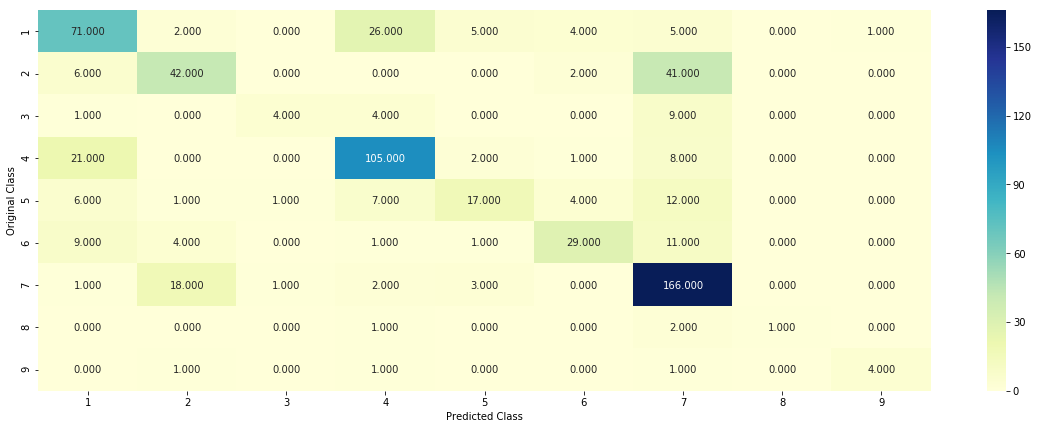

-------------------- Precision matrix (Columm Sum=1) --------------------


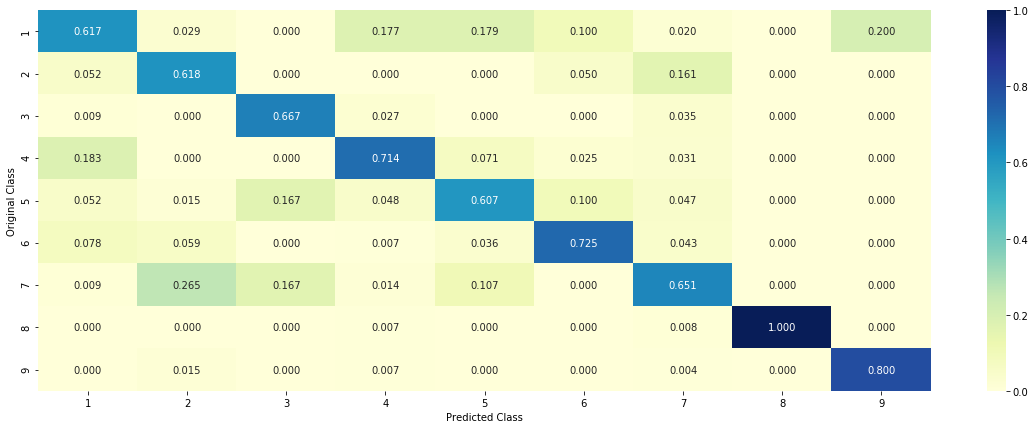

-------------------- Recall matrix (Row sum=1) --------------------


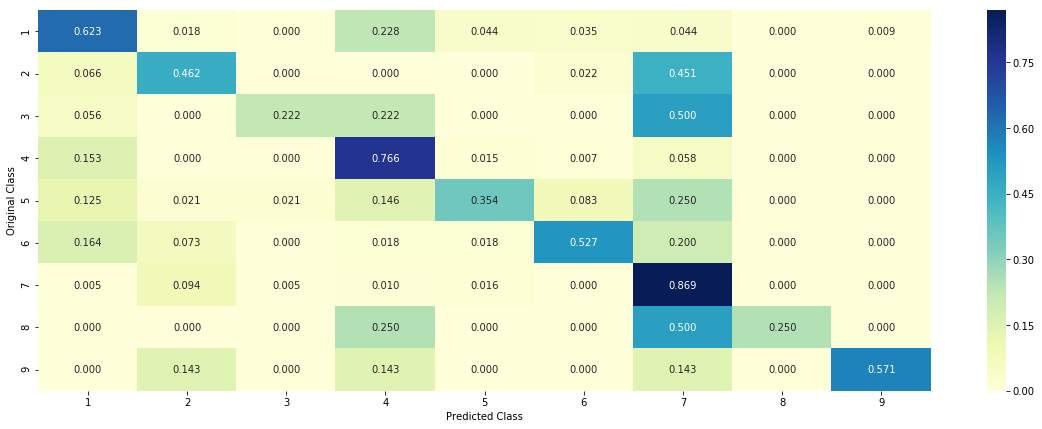

In [89]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

### No vast difference between the train loss, cv loss and test loss with 50 variation and 1000 text features.
### Lets try with Random Forest and KNN model

# Random Forest Model with 50 variation feature and 1000 Text feature

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.255769567086261
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.262205758901271
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.2468494512924837
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.2601694163158528
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.2459187351549608
--------------------------------------------------

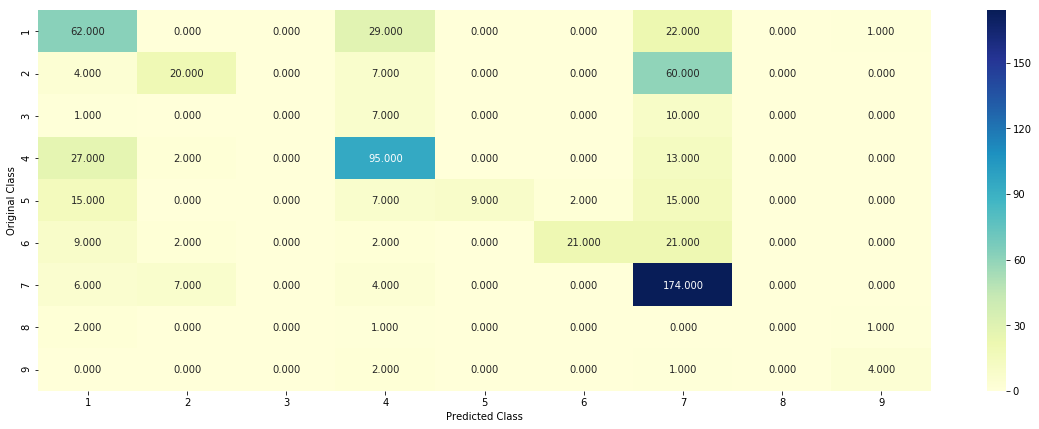

-------------------- Precision matrix (Columm Sum=1) --------------------


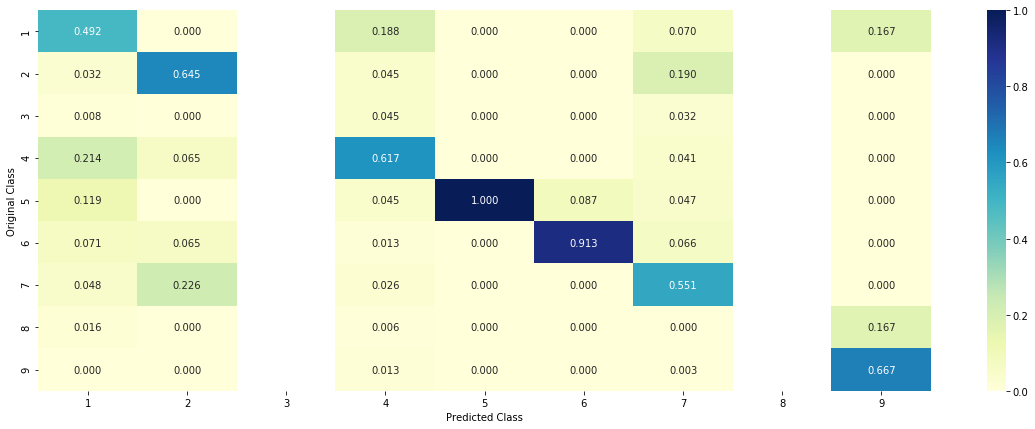

-------------------- Recall matrix (Row sum=1) --------------------


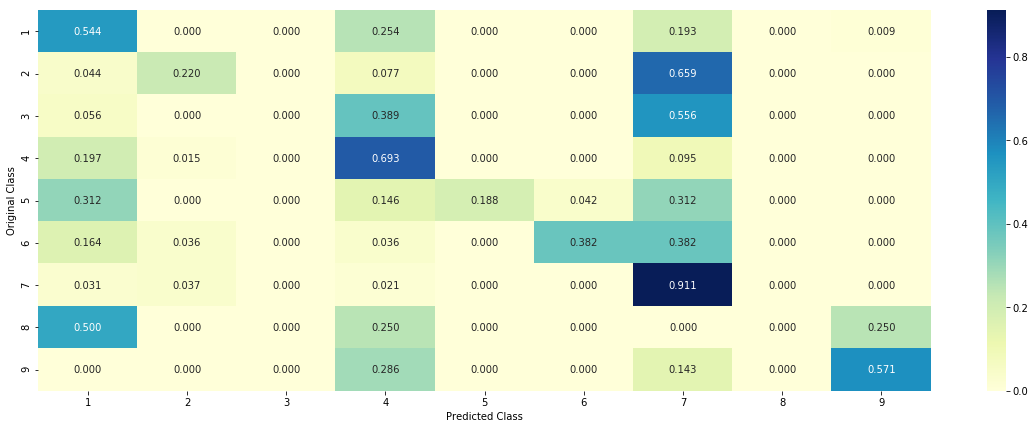

In [90]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10,]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_onehotencoding_norm, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_onehotencoding_norm, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%4)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# KNN

For alpha =  5 Log Loss : 1.1538199176860144
For alpha =  11 Log Loss : 1.1960092740332082
For alpha =  15 Log Loss : 1.2044324780748326
For alpha =  21 Log Loss : 1.2194958098297217
For alpha =  31 Log Loss : 1.2385298431597915
For alpha =  41 Log Loss : 1.252108313523799
For alpha =  51 Log Loss : 1.2603192986504406
For alpha =  99 Log Loss : 1.3152333423687201
---------------------------------------------------------------------------------------------------------------------


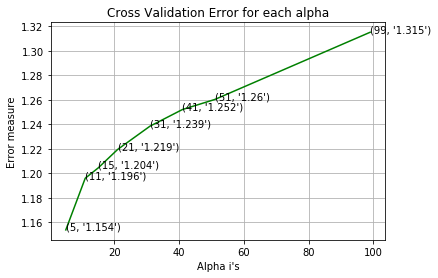

Optimal value of alpha is = 5
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  5 The train log loss is: 0.9476831604295617
For values of best alpha =  5 The cross validation log loss is: 1.1538199176860144
For values of best alpha =  5 The test log loss is: 1.2160847563260058
Log loss : 1.2160847563260058
Number of mis-classified points : 0.42105263157894735
-------------------- Confusion matrix --------------------


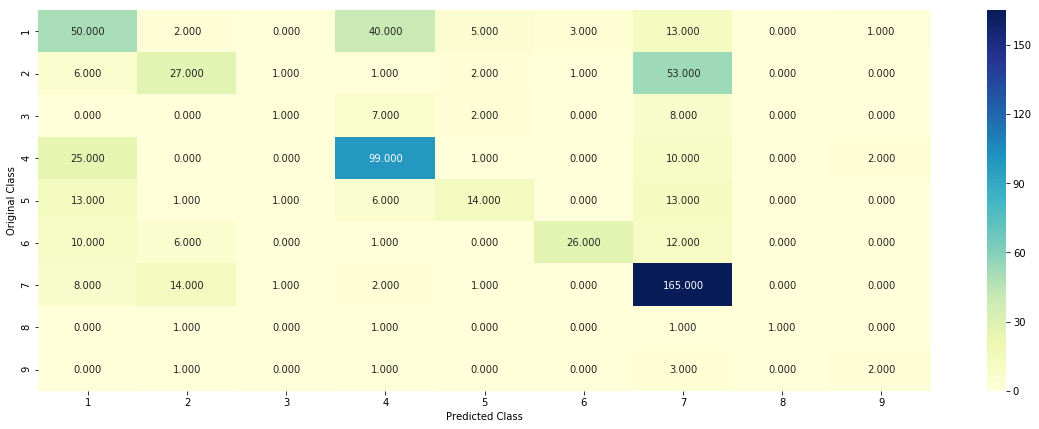

-------------------- Precision matrix (Columm Sum=1) --------------------


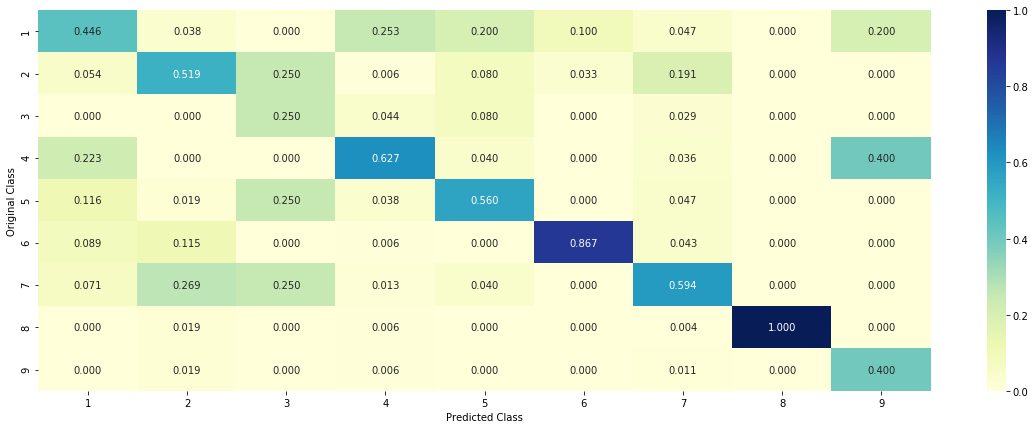

-------------------- Recall matrix (Row sum=1) --------------------


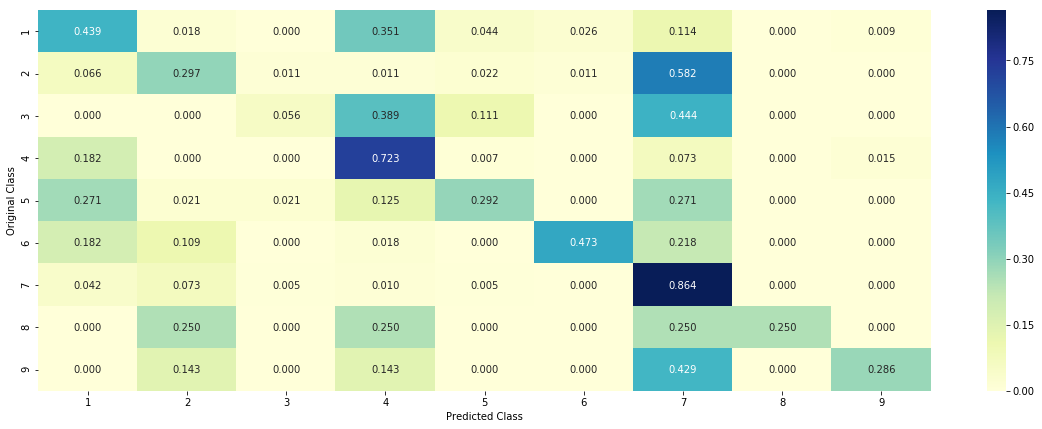

In [93]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf.fit(train_onehotencoding_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is =', alpha[best_alpha])
print('-'*117)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

### Feature Engineering with only 4Gram features for TEXT and unigram for Gene and VAriation


In [109]:
gene_vectorizer = CountVectorizer(ngram_range=(1,1))
variation_vectorizer = CountVectorizer(ngram_range=(1,1),max_features=200)
text_vectorizer = CountVectorizer(ngram_range=(4,4),max_features= 2000)

In [110]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])

In [111]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  231
Dimension of varation feature using countvectorizer is:  200
Dimension of text feature using countvectorizer is:  2000


# Stacking all the Features 

In [112]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer])

In [113]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  2431


In [114]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.3135091008330568
For alpha =  1e-05 Log Loss : 1.1358145052494895
For alpha =  0.0001 Log Loss : 1.0419858024295197
For alpha =  0.001 Log Loss : 1.1518030955024159
For alpha =  0.01 Log Loss : 1.4482501995961439
For alpha =  0.1 Log Loss : 1.6498362913768947
For alpha =  1 Log Loss : 1.6629567596485313
For alpha =  10 Log Loss : 1.665103426286135
For alpha =  100 Log Loss : 1.6654413551236382
---------------------------------------------------------------------------------------------------------------------


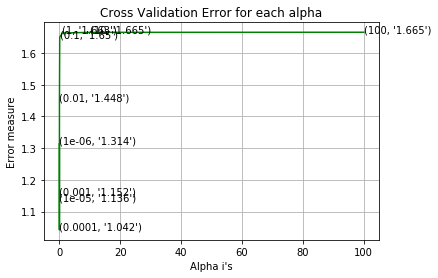

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.8296701036835835
For values of best alpha =  0.0001 The cross validation log loss is: 1.0419858024295197
For values of best alpha =  0.0001 The test log loss is: 1.162763321708249
Log loss : 1.162763321708249
Number of mis-classified points : 0.3954887218045113
-------------------- Confusion matrix --------------------


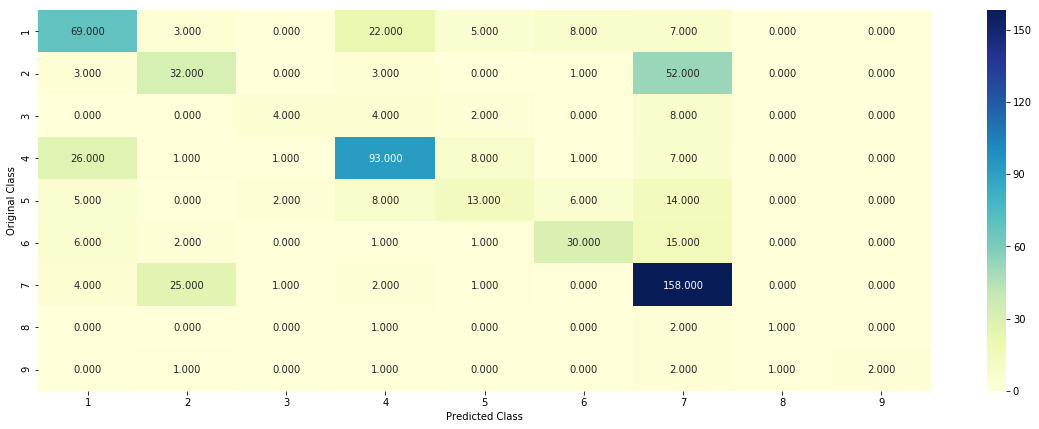

-------------------- Precision matrix (Columm Sum=1) --------------------


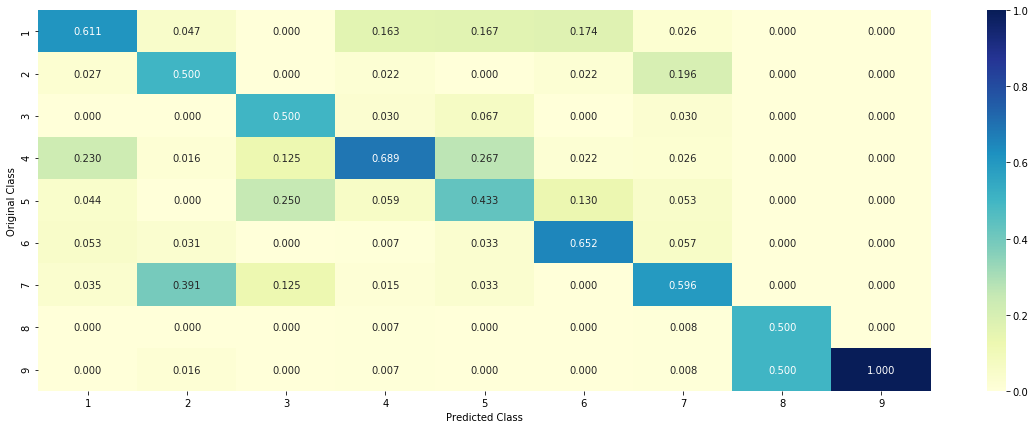

-------------------- Recall matrix (Row sum=1) --------------------


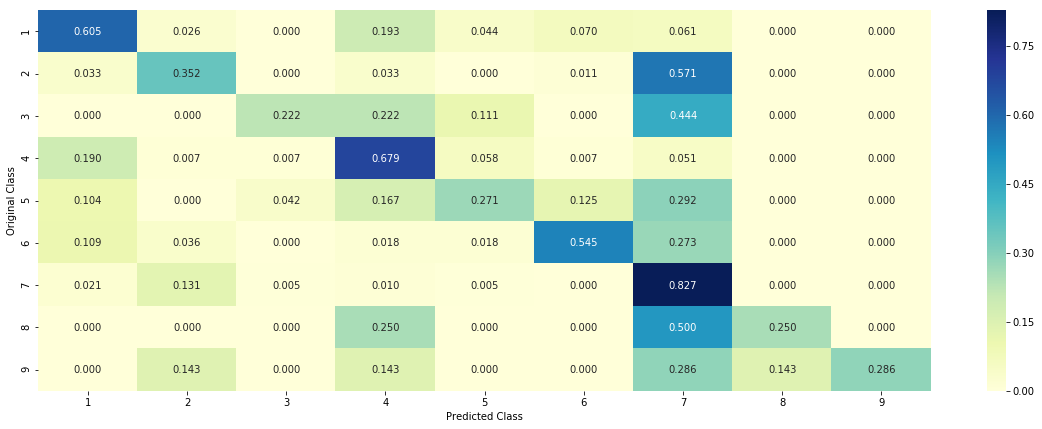

In [115]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Random Forest Model 

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.4103453101168213
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.344163213072279
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.387294545456412
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.335186875191693
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.373336715044741
----------------------------------------------------

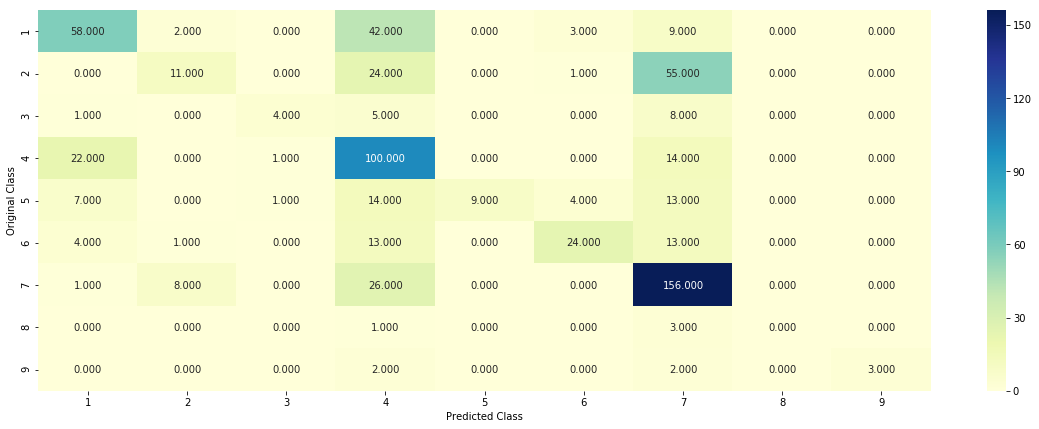

-------------------- Precision matrix (Columm Sum=1) --------------------


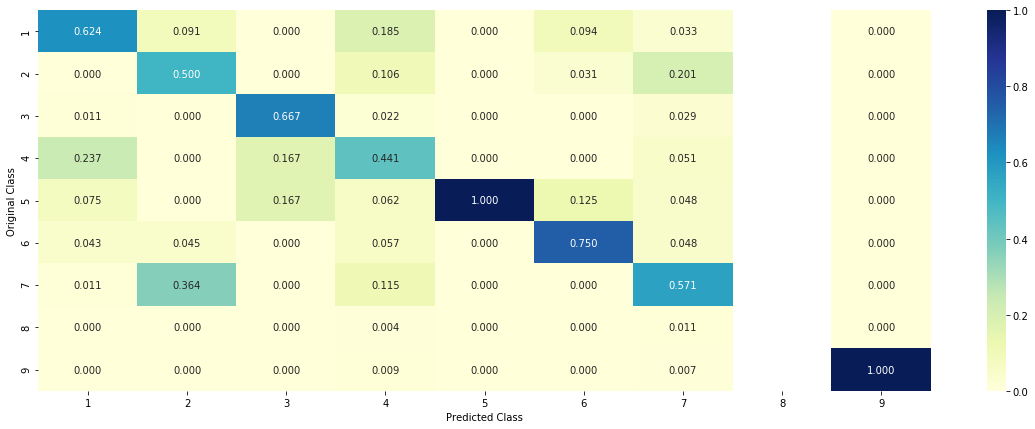

-------------------- Recall matrix (Row sum=1) --------------------


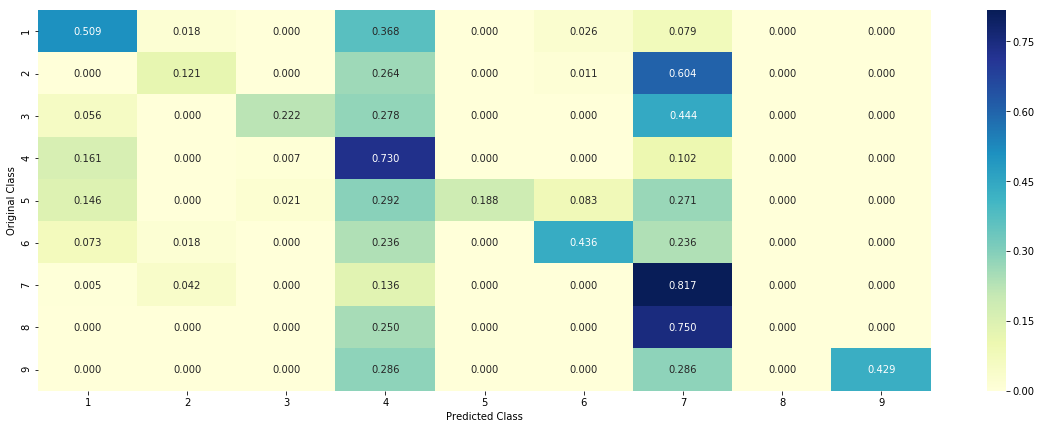

In [116]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10,]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_onehotencoding_norm, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_onehotencoding_norm, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%4)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# KNN

For alpha =  5 Log Loss : 1.235463092029313
For alpha =  11 Log Loss : 1.2816482826712947
For alpha =  15 Log Loss : 1.311199565161948
For alpha =  21 Log Loss : 1.3298843525595203
For alpha =  31 Log Loss : 1.353050595030562
For alpha =  41 Log Loss : 1.3669813257233356
For alpha =  51 Log Loss : 1.3732258581476198
For alpha =  99 Log Loss : 1.4343964602488581
---------------------------------------------------------------------------------------------------------------------


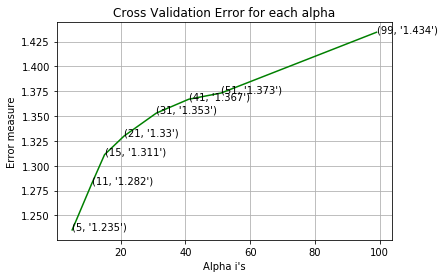

Optimal value of alpha is = 5
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  5 The train log loss is: 1.020234946906441
For values of best alpha =  5 The cross validation log loss is: 1.235463092029313
For values of best alpha =  5 The test log loss is: 1.3164747063715394
Log loss : 1.3164747063715394
Number of mis-classified points : 0.44511278195488724
-------------------- Confusion matrix --------------------


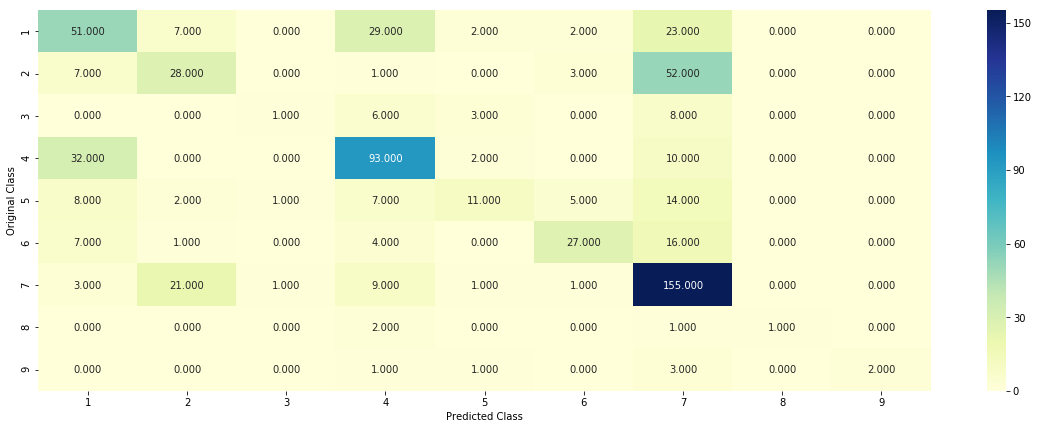

-------------------- Precision matrix (Columm Sum=1) --------------------


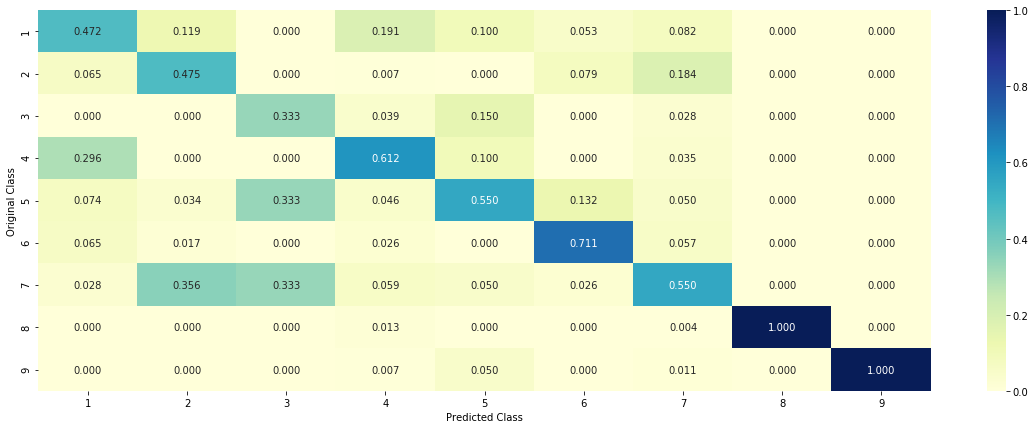

-------------------- Recall matrix (Row sum=1) --------------------


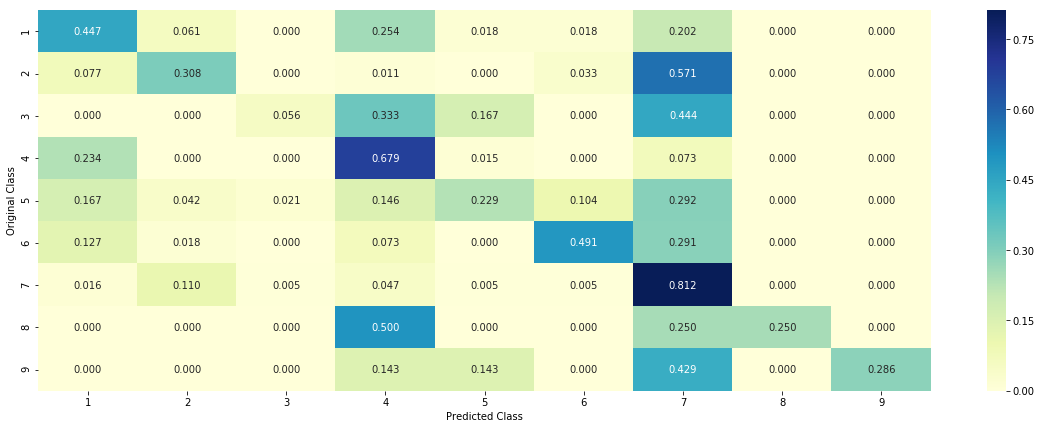

In [117]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf.fit(train_onehotencoding_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is =', alpha[best_alpha])
print('-'*117)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Only Bigram features of TEXT and unigram for Gene and Variation

In [174]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
variation_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=200)
text_vectorizer = CountVectorizer(ngram_range=(2,2),max_features= 2000)

In [175]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])

In [176]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  231
Dimension of varation feature using countvectorizer is:  200
Dimension of text feature using countvectorizer is:  2000


# Stacking all the Features 

In [177]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer])

In [178]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  2431


In [179]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.1377708677114153
For alpha =  1e-05 Log Loss : 1.0630046211409923
For alpha =  0.0001 Log Loss : 1.0140242809914755
For alpha =  0.001 Log Loss : 1.1577726770957906
For alpha =  0.01 Log Loss : 1.4753495659110019
For alpha =  0.1 Log Loss : 1.8007724425120208
For alpha =  1 Log Loss : 1.8302891350461221
For alpha =  10 Log Loss : 1.8330322466390228
For alpha =  100 Log Loss : 1.8333463694629217
---------------------------------------------------------------------------------------------------------------------


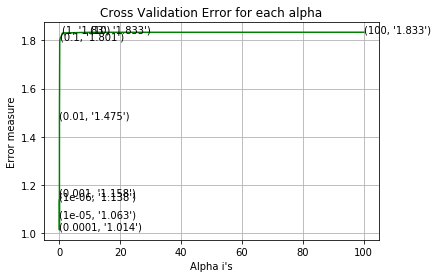

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.6970103025602048
For values of best alpha =  0.0001 The cross validation log loss is: 1.0140242809914755
For values of best alpha =  0.0001 The test log loss is: 1.0957960470300387
Log loss : 1.0957960470300387
Number of mis-classified points : 0.37293233082706767
-------------------- Confusion matrix --------------------


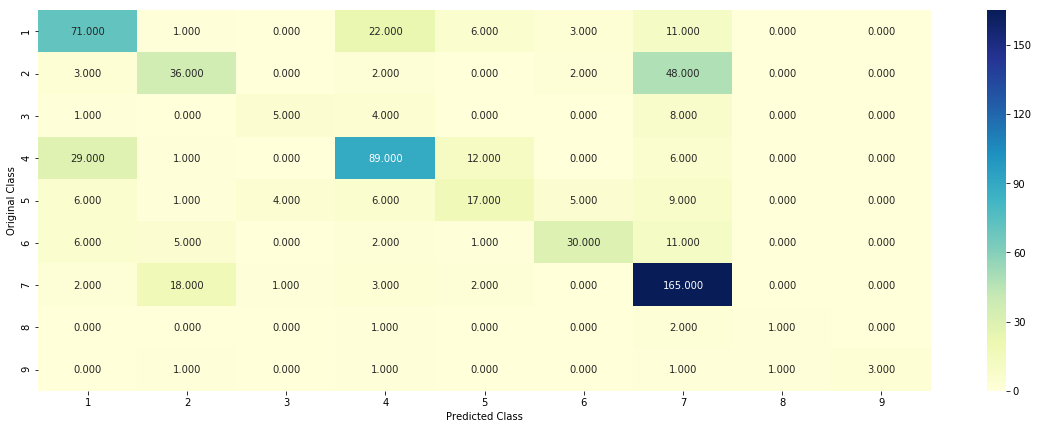

-------------------- Precision matrix (Columm Sum=1) --------------------


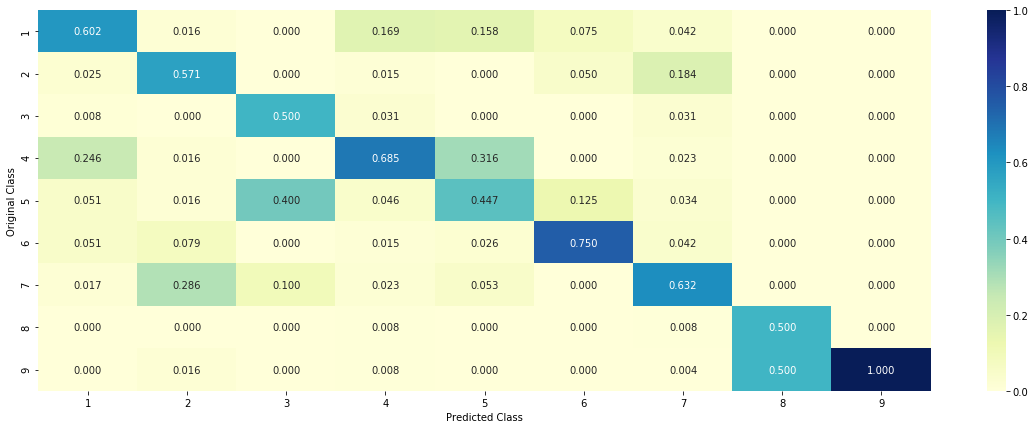

-------------------- Recall matrix (Row sum=1) --------------------


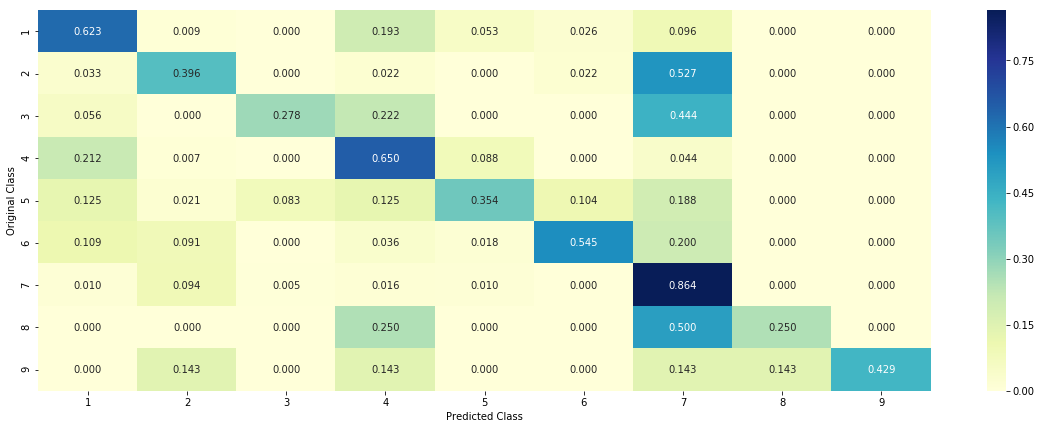

In [180]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Random Forest Model 

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.2647204523365545
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.192225132419808
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.2425925968768603
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.1845852566110076
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.2229567342125707
-------------------------------------------------

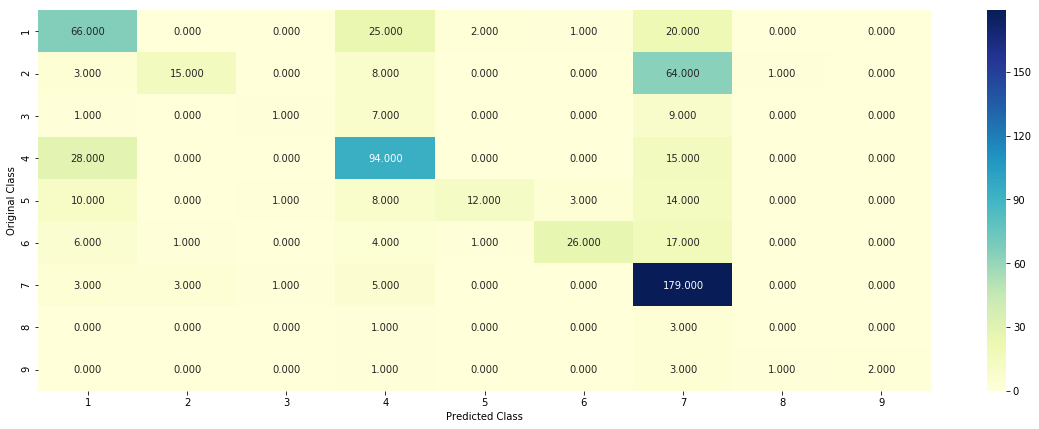

-------------------- Precision matrix (Columm Sum=1) --------------------


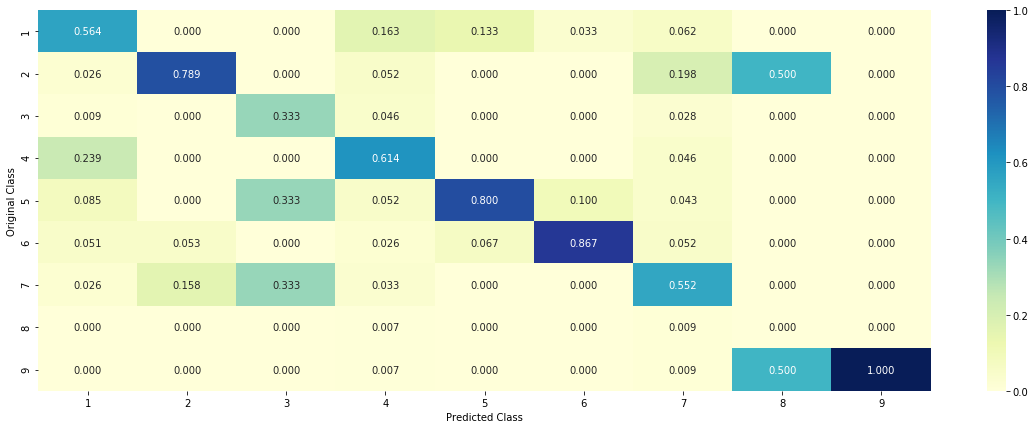

-------------------- Recall matrix (Row sum=1) --------------------


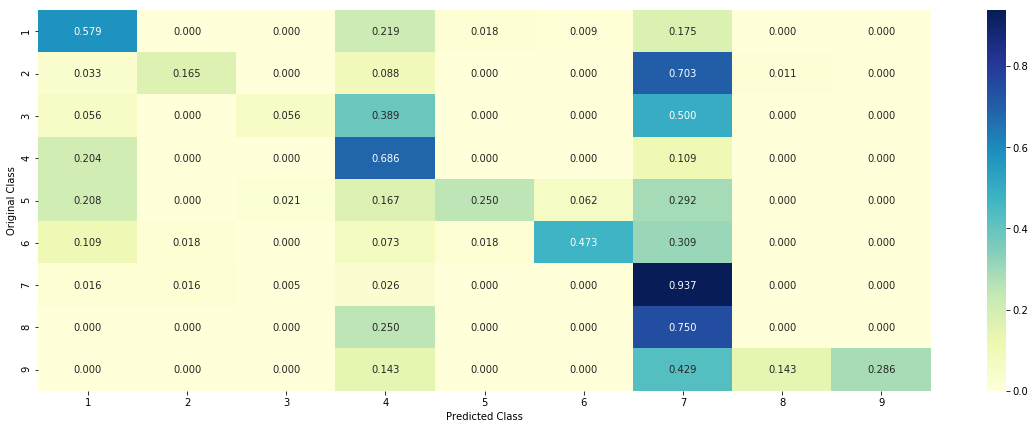

In [181]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10,]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_onehotencoding_norm, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_onehotencoding_norm, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%2)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# KNN

For alpha =  5 Log Loss : 1.2164822798731536
For alpha =  11 Log Loss : 1.2240778715503415
For alpha =  15 Log Loss : 1.2438317796936553
For alpha =  21 Log Loss : 1.2668382473500919
For alpha =  31 Log Loss : 1.2956534223558454
For alpha =  41 Log Loss : 1.3025375245061586
For alpha =  51 Log Loss : 1.3110140222153754
For alpha =  99 Log Loss : 1.352981930720517
---------------------------------------------------------------------------------------------------------------------


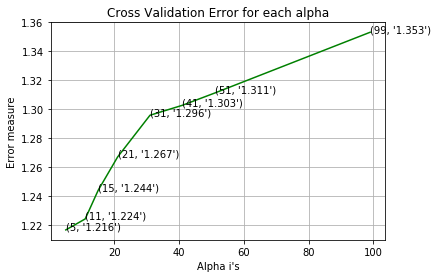

Optimal value of alpha is = 5
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  5 The train log loss is: 0.9903653281305732
For values of best alpha =  5 The cross validation log loss is: 1.2164822798731536
For values of best alpha =  5 The test log loss is: 1.2861207551543254
Log loss : 1.2861207551543254
Number of mis-classified points : 0.4345864661654135
-------------------- Confusion matrix --------------------


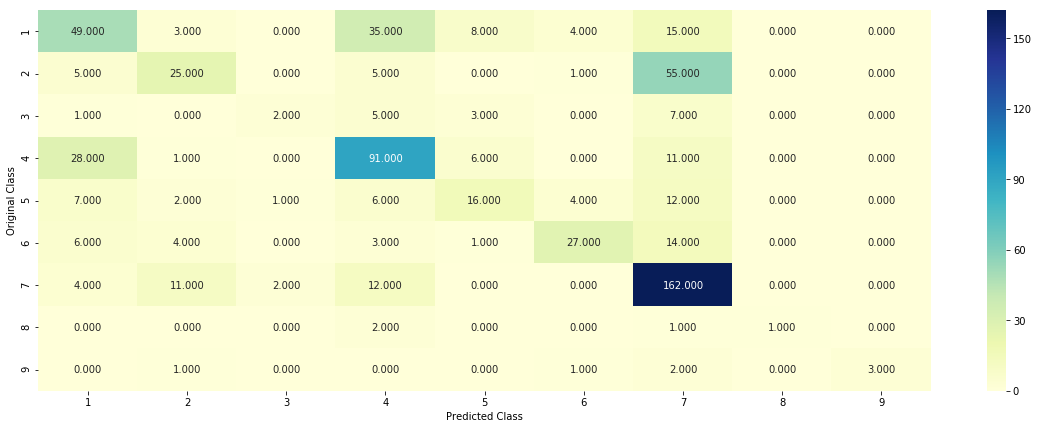

-------------------- Precision matrix (Columm Sum=1) --------------------


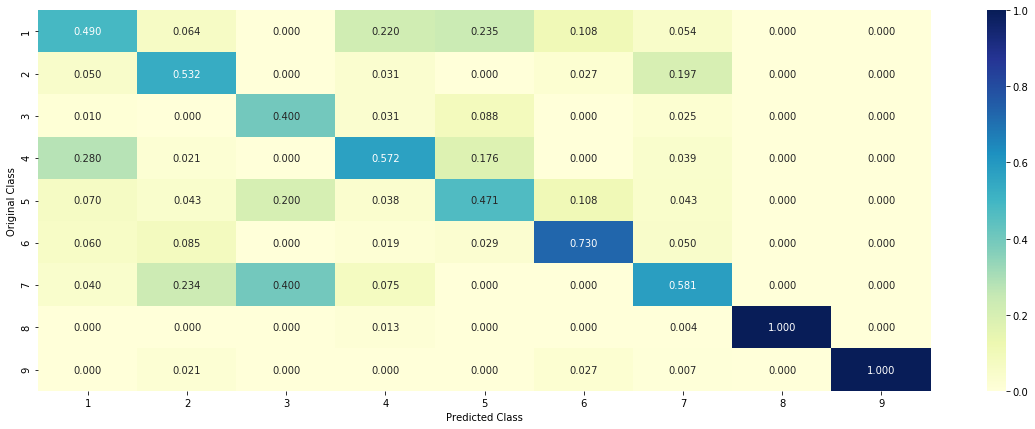

-------------------- Recall matrix (Row sum=1) --------------------


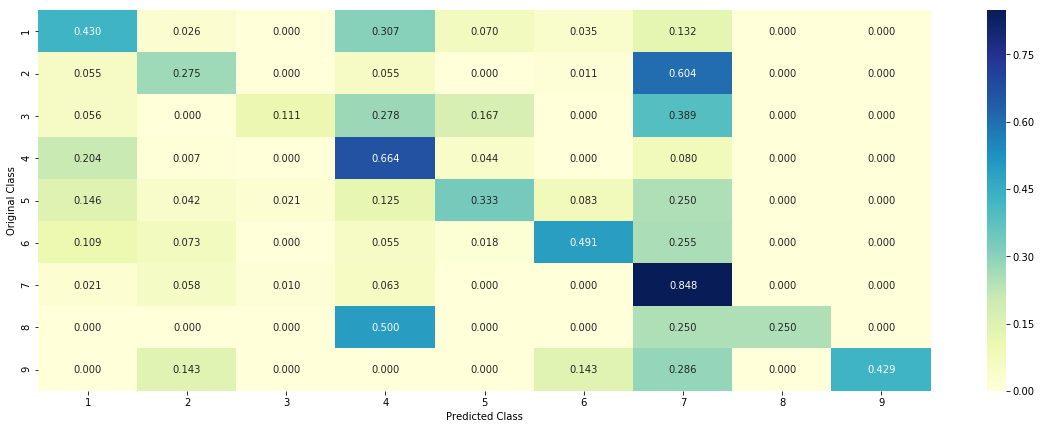

In [182]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf.fit(train_onehotencoding_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is =', alpha[best_alpha])
print('-'*117)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# 1000 Bigram and 1000 4-gram features of TEXT and gene and variation feature

In [184]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
variation_vectorizer = CountVectorizer(ngram_range=(1,2),max_features=200)
text_vectorizer_bi = CountVectorizer(ngram_range=(2,2),max_features= 1000)
text_vectorizer_ng = CountVectorizer(ngram_range=(4,4),max_features= 1000)


In [185]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer_bi = text_vectorizer_bi.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer_bi = text_vectorizer_bi.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer_bi = text_vectorizer_bi.transform(cv_df['TEXT'])

text_train_onehotencoding_countvectorizer_ng = text_vectorizer_ng.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer_ng = text_vectorizer_ng.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer_ng = text_vectorizer_ng.transform(cv_df['TEXT'])


In [186]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  231
Dimension of varation feature using countvectorizer is:  200
Dimension of text feature using countvectorizer is:  2000


# Stacking all the Features 

In [187]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer_bi,text_train_onehotencoding_countvectorizer_ng])

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer_bi,text_test_onehotencoding_countvectorizer_ng])

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer_bi,text_cv_onehotencoding_countvectorizer_ng])

In [188]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  2431


In [189]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.2238204294224102
For alpha =  1e-05 Log Loss : 1.130464918224423
For alpha =  0.0001 Log Loss : 1.0282835109563186
For alpha =  0.001 Log Loss : 1.1646662663102456
For alpha =  0.01 Log Loss : 1.4860529247642855
For alpha =  0.1 Log Loss : 1.730991742499283
For alpha =  1 Log Loss : 1.7591784633465395
For alpha =  10 Log Loss : 1.7620328989276555
For alpha =  100 Log Loss : 1.76237925690143
---------------------------------------------------------------------------------------------------------------------


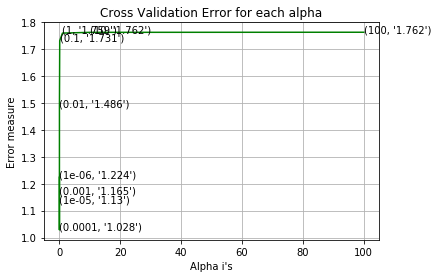

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.7520242876531672
For values of best alpha =  0.0001 The cross validation log loss is: 1.0282835109563186
For values of best alpha =  0.0001 The test log loss is: 1.116480550684018
Log loss : 1.116480550684018
Number of mis-classified points : 0.3849624060150376
-------------------- Confusion matrix --------------------


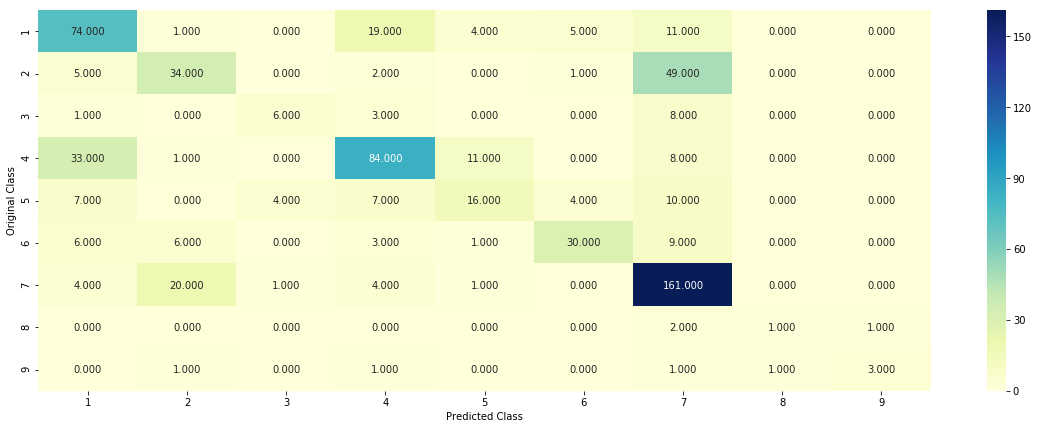

-------------------- Precision matrix (Columm Sum=1) --------------------


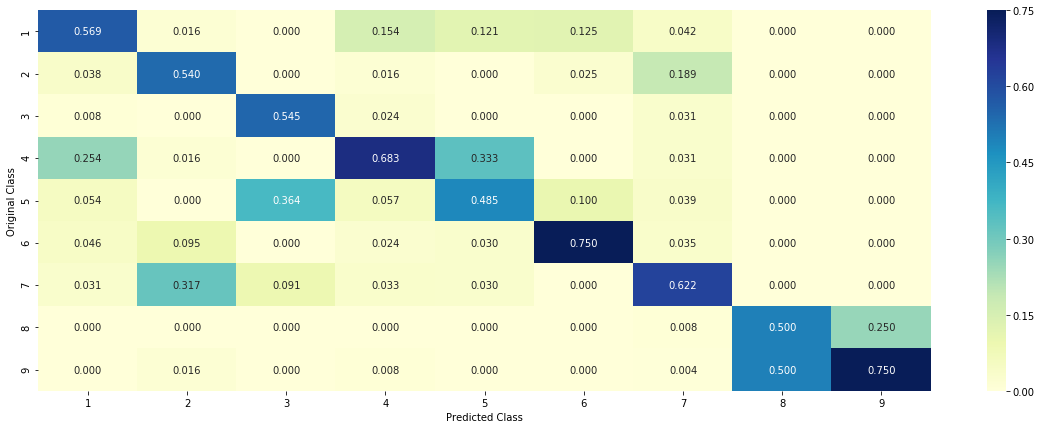

-------------------- Recall matrix (Row sum=1) --------------------


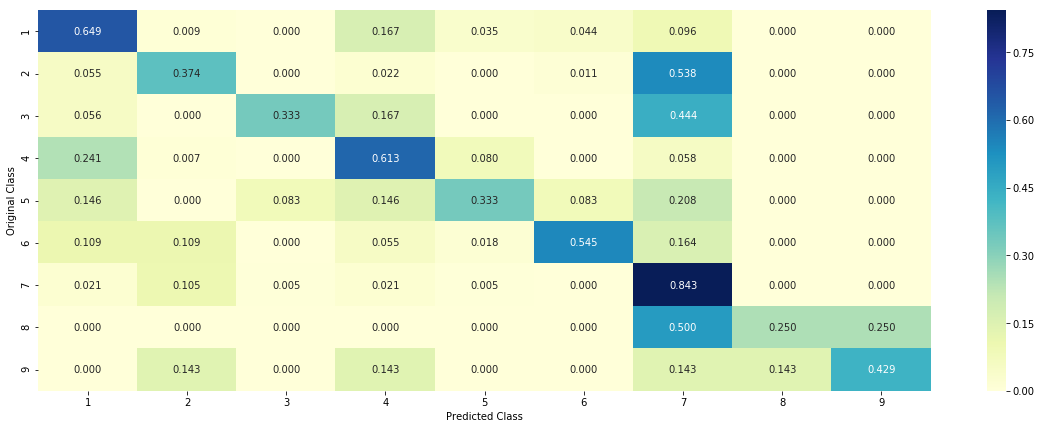

In [190]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Random Forest Model 

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.2605043472612307
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.1981738412040603
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.2396532981747928
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.1882680136660126
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.231325177310228
-------------------------------------------------

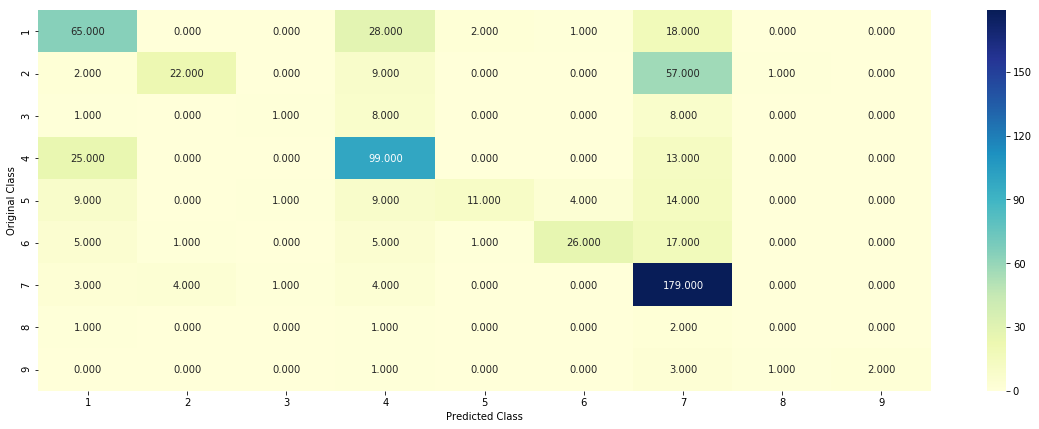

-------------------- Precision matrix (Columm Sum=1) --------------------


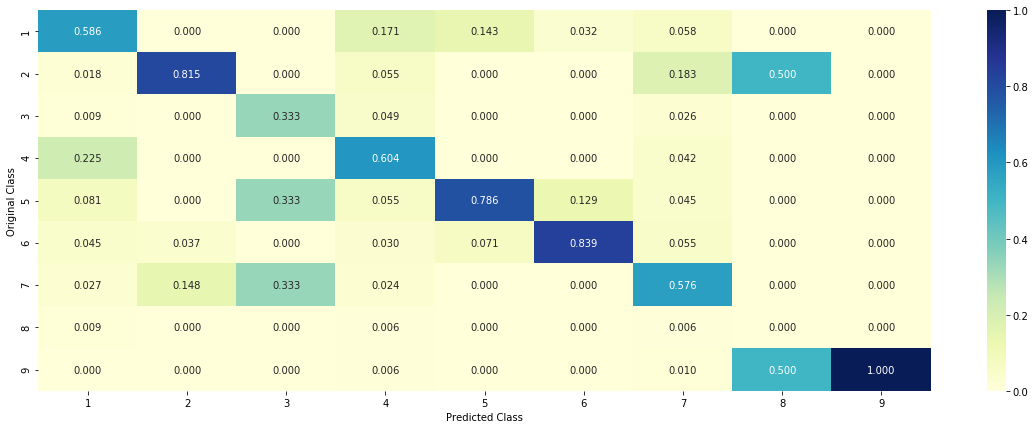

-------------------- Recall matrix (Row sum=1) --------------------


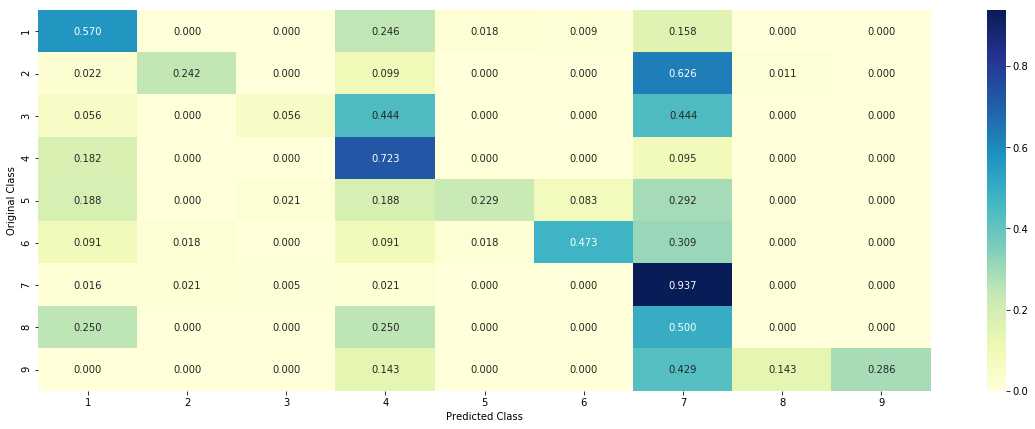

In [191]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10,]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_onehotencoding_norm, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_onehotencoding_norm, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%4)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# KNN

For alpha =  5 Log Loss : 1.186106024737942
For alpha =  11 Log Loss : 1.2466506995598599
For alpha =  15 Log Loss : 1.2722618006493973
For alpha =  21 Log Loss : 1.3151277196758744
For alpha =  31 Log Loss : 1.3578567714558178
For alpha =  41 Log Loss : 1.3637812973359225
For alpha =  51 Log Loss : 1.3813515212360288
For alpha =  99 Log Loss : 1.3840907676331082
---------------------------------------------------------------------------------------------------------------------


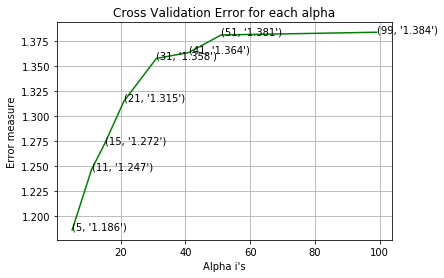

Optimal value of alpha is = 5
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  5 The train log loss is: 0.9984603281356784
For values of best alpha =  5 The cross validation log loss is: 1.186106024737942
For values of best alpha =  5 The test log loss is: 1.2728346769222774
Log loss : 1.2728346769222774
Number of mis-classified points : 0.4330827067669173
-------------------- Confusion matrix --------------------


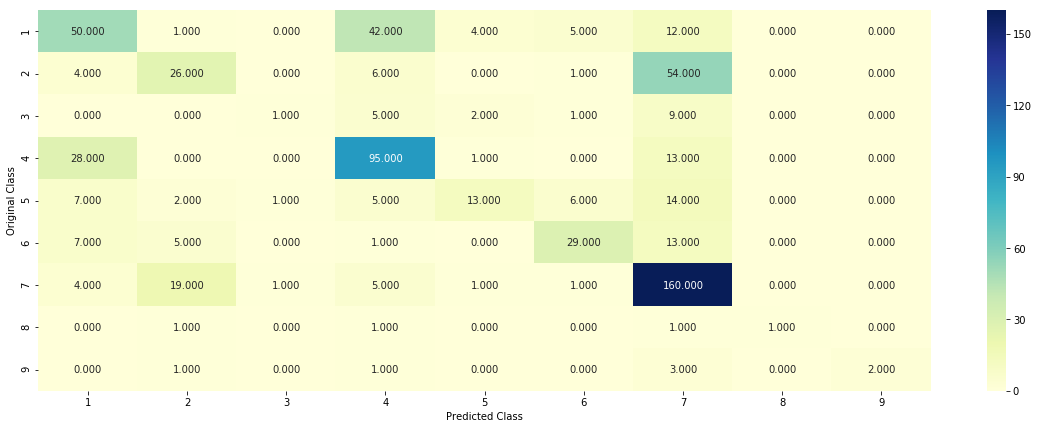

-------------------- Precision matrix (Columm Sum=1) --------------------


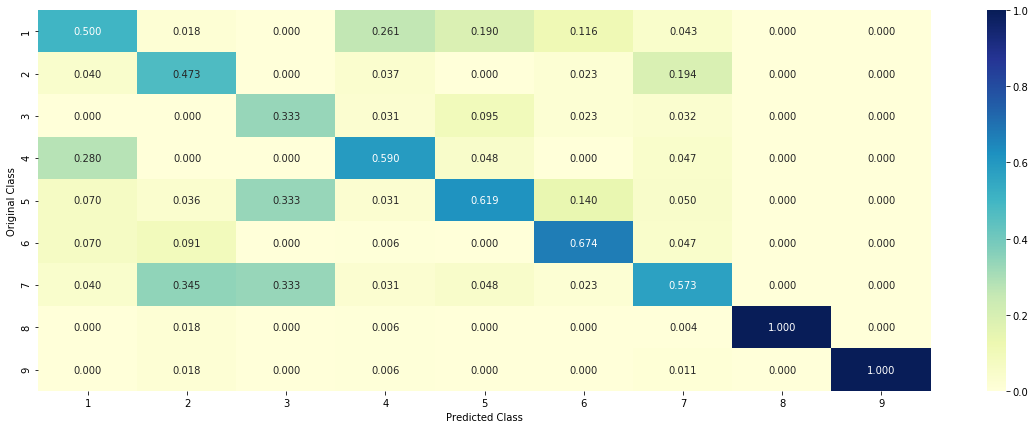

-------------------- Recall matrix (Row sum=1) --------------------


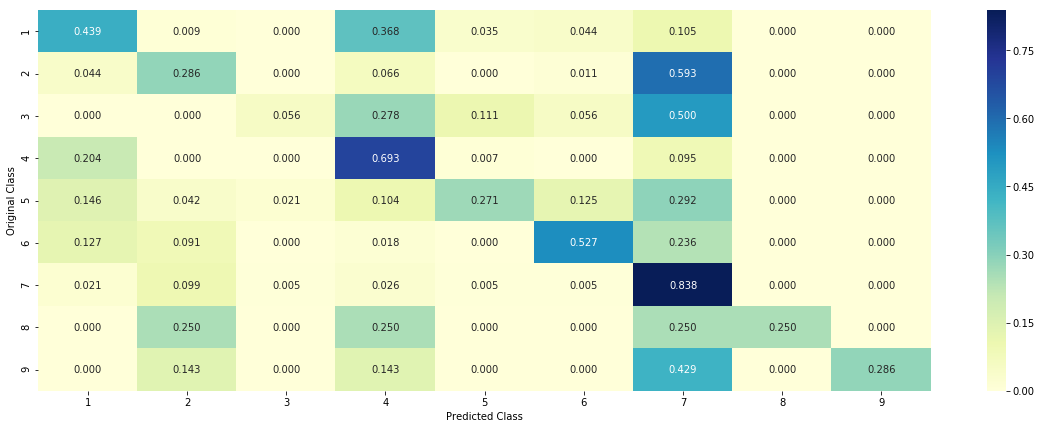

In [192]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf.fit(train_onehotencoding_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print('Optimal value of alpha is =', alpha[best_alpha])
print('-'*117)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Bigram features using TFIDF

In [132]:
gene_vectorizer = TfidfVectorizer(ngram_range=(1,2))
variation_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=50)
text_vectorizer_ng = TfidfVectorizer(ngram_range=(1,2),max_features= 10000)


In [133]:
gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


#text_train_onehotencoding_countvectorizer_bi = text_vectorizer_bi.fit_transform(train_df['TEXT'])
#text_test_onehotencoding_countvectorizer_bi = text_vectorizer_bi.transform(test_df['TEXT'])
#text_cv_onehotencoding_countvectorizer_bi = text_vectorizer_bi.transform(cv_df['TEXT'])

text_train_onehotencoding_countvectorizer_ng = text_vectorizer_ng.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer_ng = text_vectorizer_ng.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer_ng = text_vectorizer_ng.transform(cv_df['TEXT'])


In [134]:
print('Dimension of gene feature using countvectorizer is: ', gene_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of varation feature using countvectorizer is: ', variation_train_onehotencoding_countvectorizer.shape[1])
print('Dimension of text feature using countvectorizer is: ', text_train_onehotencoding_countvectorizer.shape[1])

Dimension of gene feature using countvectorizer is:  229
Dimension of varation feature using countvectorizer is:  50
Dimension of text feature using countvectorizer is:  10000


# Stacking all the Features 

In [135]:
train_onehotencoding = hstack([gene_train_onehotencoding_countvectorizer,
                                        variation_train_onehotencoding_countvectorizer,
                                        text_train_onehotencoding_countvectorizer_ng]).tocsr()

test_onehotencoding = hstack([gene_test_onehotencoding_countvectorizer,
                             variation_test_onehotencoding_countvectorizer,
                             text_test_onehotencoding_countvectorizer_ng]).tocsr()

cv_onehotencoding = hstack([gene_cv_onehotencoding_countvectorizer,
                           variation_cv_onehotencoding_countvectorizer,
                           text_cv_onehotencoding_countvectorizer_ng]).tocsr()

In [136]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape[1])

Dimension of the one hot encoded feature vectorized using countervectorizer is:  10279


In [137]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

# Machine Learning Model : Logistic Regression

For alpha =  1e-06 Log Loss : 1.2064697793774648
For alpha =  1e-05 Log Loss : 1.1759690471328046
For alpha =  0.0001 Log Loss : 1.1487635224012174
For alpha =  0.001 Log Loss : 1.2041051459403187
For alpha =  0.01 Log Loss : 1.4146618209078425
For alpha =  0.1 Log Loss : 1.5780035337177303
For alpha =  1 Log Loss : 1.7540562158966428
For alpha =  10 Log Loss : 1.7782423970126426
For alpha =  100 Log Loss : 1.7808227228377955
---------------------------------------------------------------------------------------------------------------------


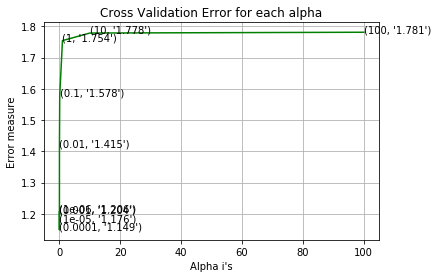

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.6063569938443143
For values of best alpha =  0.0001 The cross validation log loss is: 1.1442220001109504
For values of best alpha =  0.0001 The test log loss is: 1.0250126351424675
Log loss : 1.0250126351424675
Number of mis-classified points : 0.3473684210526316
-------------------- Confusion matrix --------------------


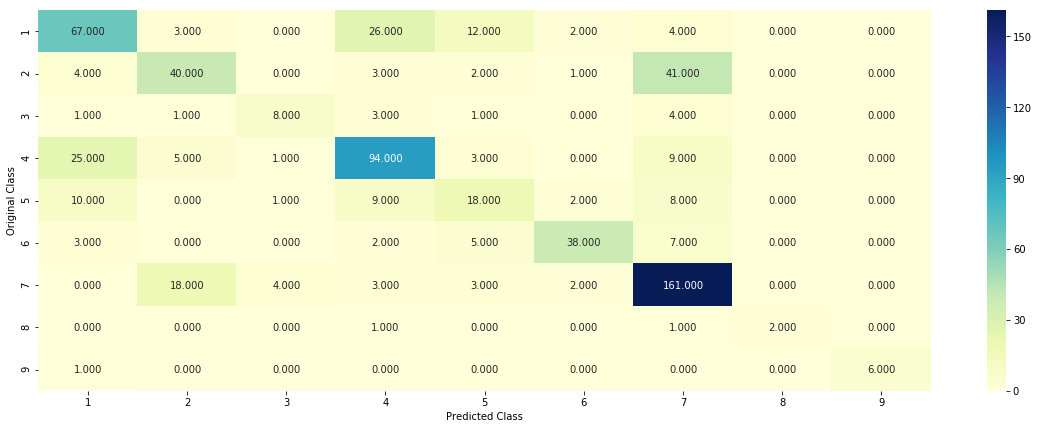

-------------------- Precision matrix (Columm Sum=1) --------------------


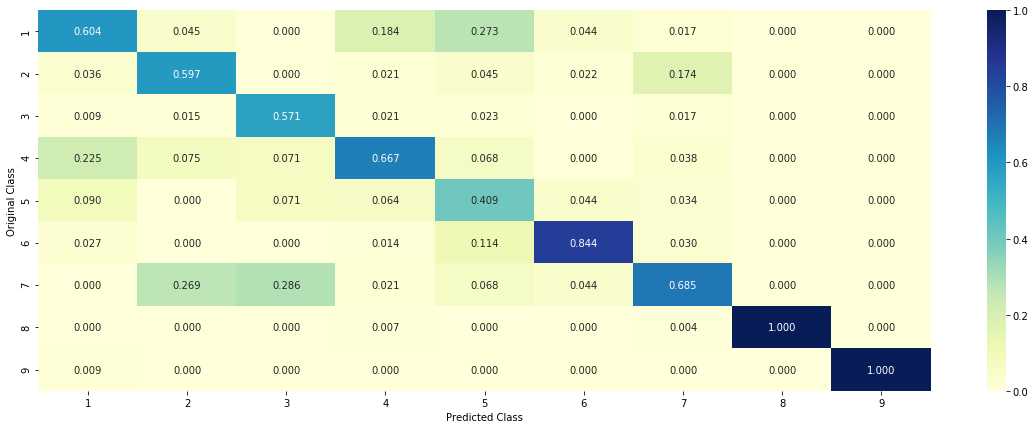

-------------------- Recall matrix (Row sum=1) --------------------


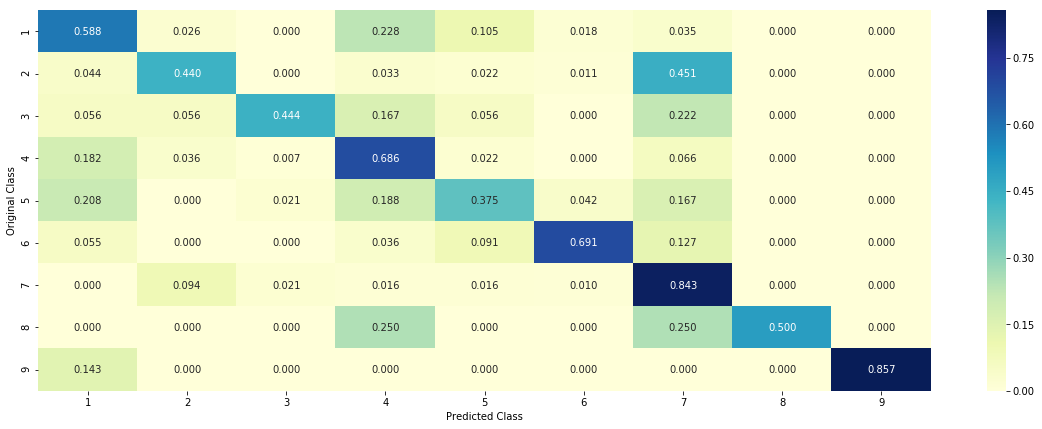

In [138]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier( alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Feature Engineering

In [139]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

- creating gene variation feature

In [140]:
train_df['gene_variation'] = train_df['Gene'] + ' ' + train_df['Variation']

In [141]:
train_df.head()

ID    Gene       Variation  Class  \
368    368   EPAS1      533_534del      2   
1819  1819    RHOA            E40T      2   
3097  3097  NOTCH2  2010_2471trunc      2   
2572  2572   BRCA1            I89T      6   
1248  1248  PIK3R1          L370fs      1   

                                                   TEXT         gene_variation  
368   hypoxia inducible factors hifs transcription f...       EPAS1 533_534del  
1819  mutational hotspots indicate selective pressur...              RHOA E40T  
3097  hajdu cheney syndrome rare autosomal dominant ...  NOTCH2 2010_2471trunc  
2572  germline mutations breast cancer 1 brca1 gene ...             BRCA1 I89T  
1248  previously characterized mutants p85 regulator...          PIK3R1 L370fs

In [142]:
test_df['gene_variation'] = test_df['Gene'] + ' ' + test_df['Variation']
cv_df['gene_variation'] = cv_df['Gene'] + ' ' + cv_df['Variation']

In [155]:
#gene_vectorizer = CountVectorizer()
#variation_vectorizer = CountVectorizer()
text_vectorizer = TfidfVectorizer(ngram_range=(1,4),max_features= 5000)
gene_variation_vectorizer = CountVectorizer()

In [156]:
#gene_train_onehotencoding_countvectorizer = gene_vectorizer.fit_transform(train_df['Gene'])
#gene_test_onehotencoding_countvectorizer = gene_vectorizer.transform(test_df['Gene'])
#gene_cv_onehotencoding_countvectorizer = gene_vectorizer.transform(cv_df['Gene'])


#variation_train_onehotencoding_countvectorizer = variation_vectorizer.fit_transform(train_df['Variation'])
#variation_test_onehotencoding_countvectorizer = variation_vectorizer.transform(test_df['Variation'])
#variation_cv_onehotencoding_countvectorizer = variation_vectorizer.transform(cv_df['Variation'])


text_train_onehotencoding_countvectorizer = text_vectorizer.fit_transform(train_df['TEXT'])
text_test_onehotencoding_countvectorizer = text_vectorizer.transform(test_df['TEXT'])
text_cv_onehotencoding_countvectorizer = text_vectorizer.transform(cv_df['TEXT'])


gene_vari_train_onehotencoding_countvectorizer = gene_variation_vectorizer.fit_transform(train_df['gene_variation'])
gene_vari_test_onehotencoding_countvectorizer = gene_variation_vectorizer.transform(test_df['gene_variation'])
gene_vari_cv_onehotencoding_countvectorizer = gene_variation_vectorizer.transform(cv_df['gene_variation'])

# Stacking all the Features 

In [157]:
train_onehotencoding = hstack([
                                        text_train_onehotencoding_countvectorizer,
                              gene_vari_train_onehotencoding_countvectorizer])

test_onehotencoding = hstack([
                             text_test_onehotencoding_countvectorizer,
                              gene_vari_test_onehotencoding_countvectorizer])

cv_onehotencoding = hstack([
                           text_cv_onehotencoding_countvectorizer,
                            gene_vari_cv_onehotencoding_countvectorizer])

In [158]:
print('Dimension of the one hot encoded feature vectorized using countervectorizer is: ',train_onehotencoding.shape)

Dimension of the one hot encoded feature vectorized using countervectorizer is:  (2124, 7156)


In [159]:
train_onehotencoding_norm = normalize(train_onehotencoding,axis = 0)
test_onehotencoding_norm = normalize(test_onehotencoding,axis = 0)
cv_onehotencoding_norm = normalize(cv_onehotencoding,axis = 0)

For alpha =  1e-10 Log Loss : 1.236193877583153
For alpha =  1e-09 Log Loss : 1.2402269295731367
For alpha =  1e-08 Log Loss : 1.1998764188342204
For alpha =  1e-07 Log Loss : 1.2306974777667106
For alpha =  1e-06 Log Loss : 1.2239739815941488
For alpha =  1e-05 Log Loss : 1.2294010805687254
For alpha =  0.0001 Log Loss : 1.188966110830773
For alpha =  0.001 Log Loss : 1.3108301089447822
For alpha =  0.01 Log Loss : 1.83025998050078
For alpha =  0.1 Log Loss : 1.8302599807217095
For alpha =  1 Log Loss : 1.830259980623228
For alpha =  10 Log Loss : 1.8302599806220363
For alpha =  100 Log Loss : 1.83025998062201
---------------------------------------------------------------------------------------------------------------------


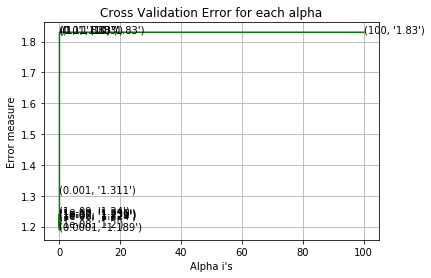

Optimal value of alpha is:  0.0001
---------------------------------------------------------------------------------------------------------------------
For values of best alpha =  0.0001 The train log loss is: 0.44001182443282283
For values of best alpha =  0.0001 The cross validation log loss is: 1.206768938406344
For values of best alpha =  0.0001 The test log loss is: 1.0419999216121218
Log loss : 1.0419999216121218
Number of mis-classified points : 0.34887218045112783
-------------------- Confusion matrix --------------------


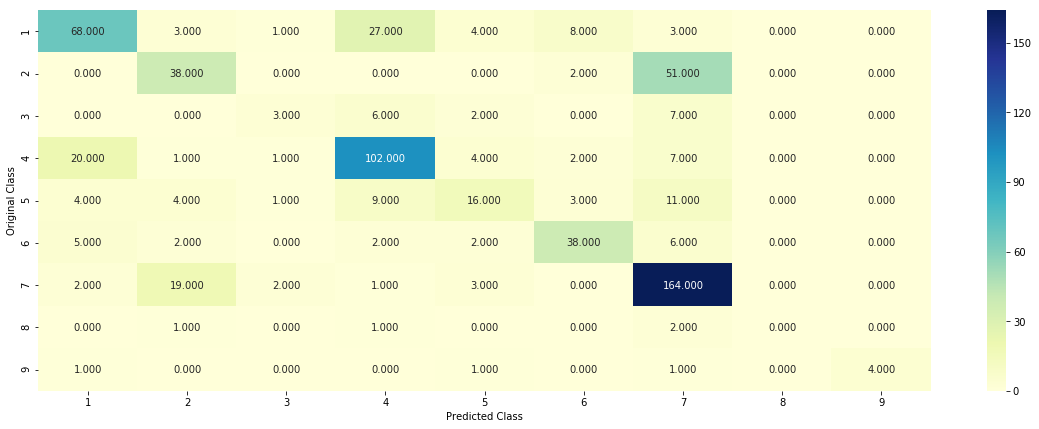

-------------------- Precision matrix (Columm Sum=1) --------------------


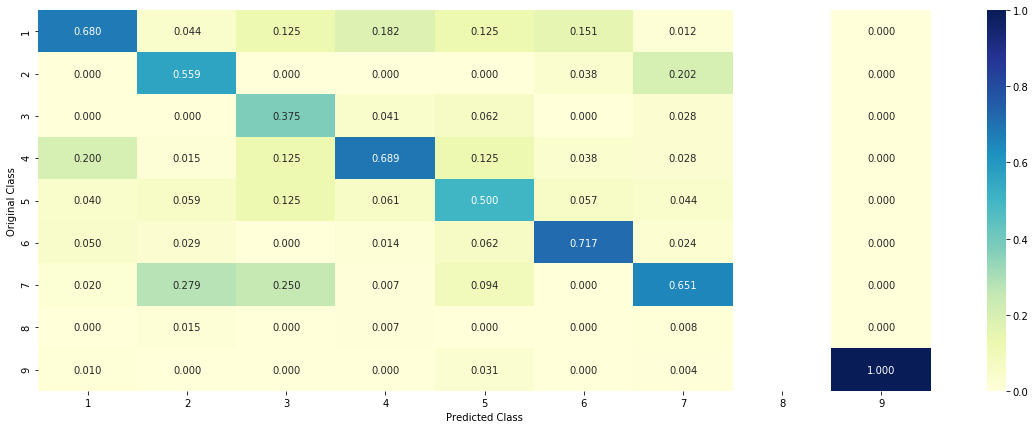

-------------------- Recall matrix (Row sum=1) --------------------


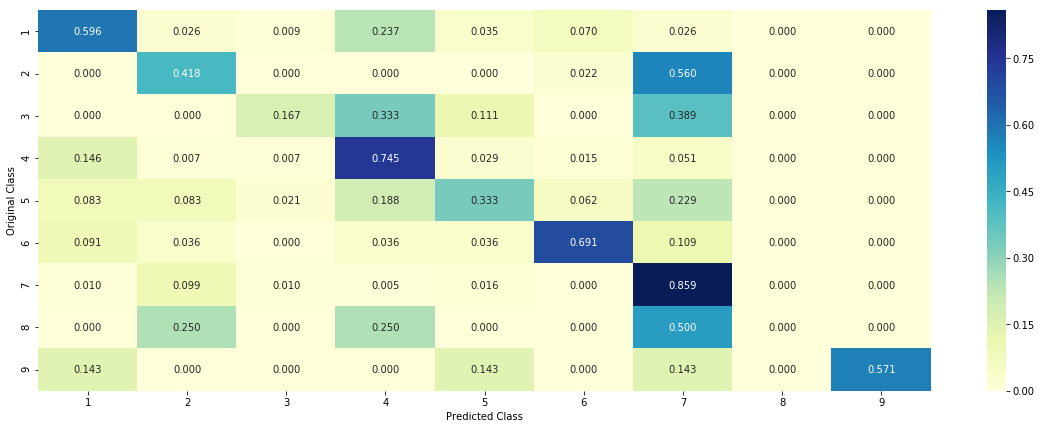

In [160]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-10, 3)]
cv_log_error_array = []
for i in alpha:
   
    clf = SGDClassifier( alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(train_onehotencoding_norm,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_onehotencoding_norm, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 
print('-'*117)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
print("Optimal value of alpha is: ",alpha[best_alpha])
print('-'*117)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Random Forest Model 

---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  5
Log Loss : 1.2774865464194833
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 100 and max depth =  10
Log Loss : 1.2212269956701327
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  5
Log Loss : 1.2293444692219866
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 200 and max depth =  10
Log Loss : 1.1994076704723526
---------------------------------------------------------------------------------------------------------------------
for n_estimators = 500 and max depth =  5
Log Loss : 1.2118375886995874
------------------------------------------------

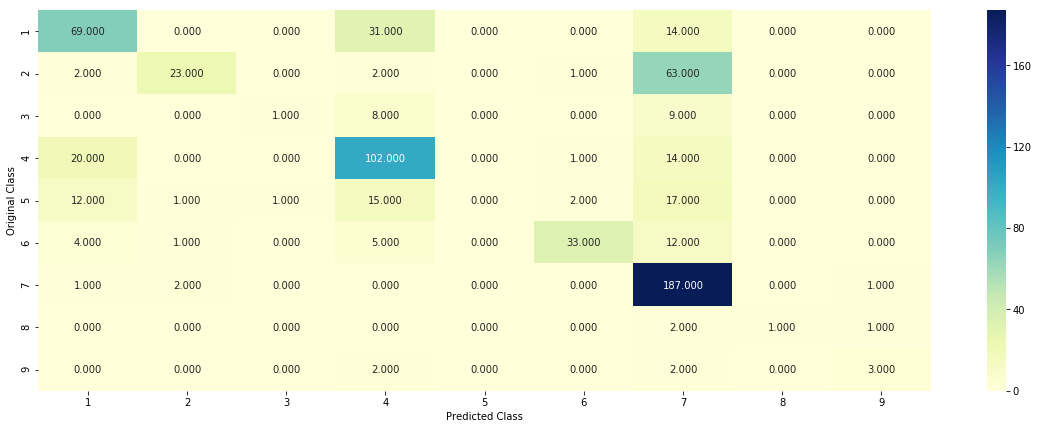

-------------------- Precision matrix (Columm Sum=1) --------------------


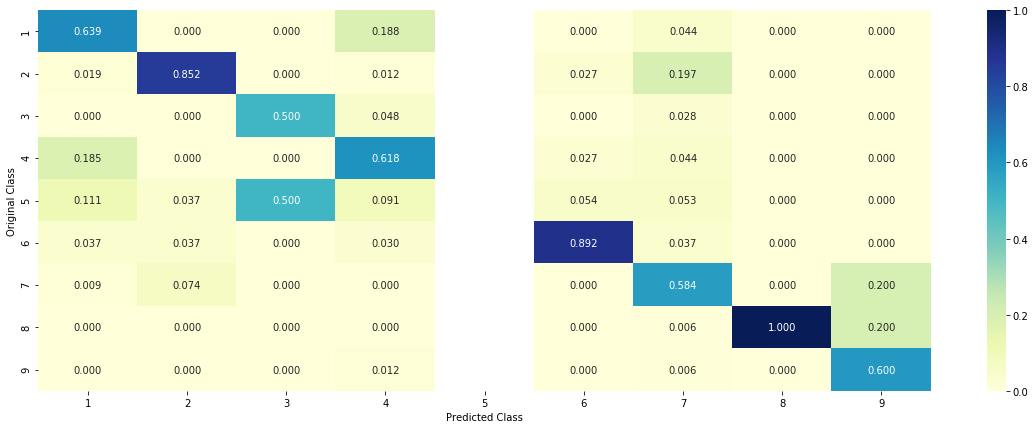

-------------------- Recall matrix (Row sum=1) --------------------


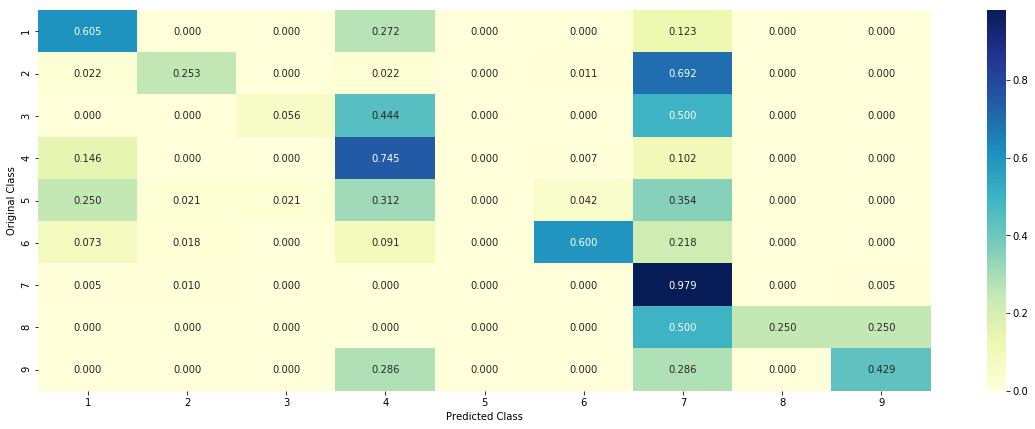

In [161]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10,]
cv_log_error_array = []
print('-'*117)
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_onehotencoding_norm, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_onehotencoding_norm, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_onehotencoding_norm)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        print('-'*117)

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
print("Optimal estimator is:",alpha[int(best_alpha/2)],"and optimal max depth is: ",max_depth[int(best_alpha%2)])
print('-'*117)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_onehotencoding_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_onehotencoding_norm, y_train)

predict_y = sig_clf.predict_proba(train_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_onehotencoding_norm)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_onehotencoding_norm, y_train, test_onehotencoding_norm, y_test, clf)

# Creating New Features to get Log Loss Further low

In [8]:
data = pd.read_csv('training_variants.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [9]:
data['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [10]:
data_text =pd.read_csv("training_text.csv",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [12]:
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...

In [34]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [14]:
result['Gene_Share'] = result.apply(lambda r: sum([1 for w in r['Gene'].split() if w in r['TEXT'].split()]), axis=1)
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  
0  Cyclin-dependent kinases (CDKs) regulate a var...           1  
1   Abstract Background  Non-small cell lung canc...           1  
2   Abstract Background  Non-small cell lung canc...           1  
3  Recent evidence has demonstrated that acquired...           1  
4  Oncogenic mutations in the monomeric Casitas B...           1

In [15]:
result['Variation_Share'] = result.apply(lambda r: sum([1 for w in r['Variation'].split(' ') if w in r['TEXT'].split(' ')]), axis=1)
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  \
0  Cyclin-dependent kinases (CDKs) regulate a var...           1   
1   Abstract Background  Non-small cell lung canc...           1   
2   Abstract Background  Non-small cell lung canc...           1   
3  Recent evidence has demonstrated that acquired...           1   
4  Oncogenic mutations in the monomeric Casitas B...           1   

   Variation_Share  
0                1  
1                1  
2                1  
3                1  
4                1

In [16]:
result["Word_Count"] = result["TEXT"].apply(lambda x: len(x.split()))
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  \
0  Cyclin-dependent kinases (CDKs) regulate a var...           1   
1   Abstract Background  Non-small cell lung canc...           1   
2   Abstract Background  Non-small cell lung canc...           1   
3  Recent evidence has demonstrated that acquired...           1   
4  Oncogenic mutations in the monomeric Casitas B...           1   

   Variation_Share  Word_Count  
0                1        6089  
1                1        5722  
2                1        5722  
3                1        5572  
4                1        6202

In [17]:
result["Word_Count_5000"] = result["Word_Count"].apply(lambda x: 1 if x > 5000 else 0)
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  \
0  Cyclin-dependent kinases (CDKs) regulate a var...           1   
1   Abstract Background  Non-small cell lung canc...           1   
2   Abstract Background  Non-small cell lung canc...           1   
3  Recent evidence has demonstrated that acquired...           1   
4  Oncogenic mutations in the monomeric Casitas B...           1   

   Variation_Share  Word_Count  Word_Count_5000  
0                1        6089                1  
1                1        5722                1  
2                1        5722                1  
3                1        5572                1  
4                1        6202                1

In [18]:
result['Character_Count'] = result['TEXT'].apply(lambda x: len(str(x)))
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  \
0  Cyclin-dependent kinases (CDKs) regulate a var...           1   
1   Abstract Background  Non-small cell lung canc...           1   
2   Abstract Background  Non-small cell lung canc...           1   
3  Recent evidence has demonstrated that acquired...           1   
4  Oncogenic mutations in the monomeric Casitas B...           1   

   Variation_Share  Word_Count  Word_Count_5000  Character_Count  
0                1        6089                1            39765  
1                1        5722                1            36831  
2                1        5722                1            36831  
3                1        5572                1            36308  
4                1        6202                1            41427

In [19]:
result['Avg_length'] = result['Character_Count'] / result['Word_Count']
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  Gene_Share  \
0  Cyclin-dependent kinases (CDKs) regulate a var...           1   
1   Abstract Background  Non-small cell lung canc...           1   
2   Abstract Background  Non-small cell lung canc...           1   
3  Recent evidence has demonstrated that acquired...           1   
4  Oncogenic mutations in the monomeric Casitas B...           1   

   Variation_Share  Word_Count  Word_Count_5000  Character_Count  Avg_length  
0                1        6089                1            39765    6.530629  
1                1        5722                1            36831    6.436735  
2                1        5722                1            36831    6.436735  
3                1        5572                1            36308    6.516152  
4                1        6202                1            41427    6.679619

In [20]:
result.drop(['TEXT'],axis = 1,inplace= True)

In [21]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [22]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 299.16536765217387 seconds


In [23]:
# Joining Text which is processed :
result = pd.merge(result, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  Gene_Share  Variation_Share  \
0   0  FAM58A  Truncating Mutations      1           1                1   
1   1     CBL                 W802*      2           1                1   
2   2     CBL                 Q249E      2           1                1   
3   3     CBL                 N454D      3           1                1   
4   4     CBL                 L399V      4           1                1   

   Word_Count  Word_Count_5000  Character_Count  Avg_length  \
0        6089                1            39765    6.530629   
1        5722                1            36831    6.436735   
2        5722                1            36831    6.436735   
3        5572                1            36308    6.516152   
4        6202                1            41427    6.679619   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [25]:
result['Gene_Variation'] = result['Gene'] + " " + result["Variation"]
result.head()

ID    Gene             Variation  Class  Gene_Share  Variation_Share  \
0   0  FAM58A  Truncating_Mutations      1           1                1   
1   1     CBL                 W802*      2           1                1   
2   2     CBL                 Q249E      2           1                1   
3   3     CBL                 N454D      3           1                1   
4   4     CBL                 L399V      4           1                1   

   Word_Count  Word_Count_5000  Character_Count  Avg_length  \
0        6089                1            39765    6.530629   
1        5722                1            36831    6.436735   
2        5722                1            36831    6.436735   
3        5572                1            36308    6.516152   
4        6202                1            41427    6.679619   

                                                TEXT  \
0  cyclin dependent kinases cdks regulate variety...   
1  abstract background non small cell lung cancer...   
2  abstract background non small cell lung cancer...   
3  recent evidence demonstrated acquired uniparen...   
4  oncogenic mutations monomeric casitas b lineag...   

                Gene_Variation  
0  FAM58A Truncating_Mutations  
1                    CBL W802*  
2                    CBL Q249E  
3                    CBL N454D  
4                    CBL L399V

# Train - Test Split

In [35]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
result.Gene_Variation = result.Gene_Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2, random_state = 1)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state = 1)

print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


In [36]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [37]:
# creating a pandas dataframe of the vectorized features
df_gene_train = pd.DataFrame(train_gene_feature_onehotCoding.toarray(), columns=gene_vectorizer.get_feature_names())
df_gene_test = pd.DataFrame(test_gene_feature_onehotCoding.toarray(), columns=gene_vectorizer.get_feature_names())
df_gene_cv = pd.DataFrame(cv_gene_feature_onehotCoding.toarray(), columns=gene_vectorizer.get_feature_names())

In [38]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [39]:
df_var_train = pd.DataFrame(train_variation_feature_onehotCoding.toarray(), columns=variation_vectorizer.get_feature_names())
df_var_test = pd.DataFrame(test_variation_feature_onehotCoding.toarray(), columns=variation_vectorizer.get_feature_names())
df_var_cv = pd.DataFrame(cv_variation_feature_onehotCoding.toarray(), columns=variation_vectorizer.get_feature_names())

In [40]:
# one-hot encoding of gene_and_variation feature.
gene_variation_vectorizer = CountVectorizer()
train_gene_and_variation_feature_onehotCoding = gene_variation_vectorizer.fit_transform(train_df["Gene_Variation"])
test_gene_and_variation_feature_onehotCoding = gene_variation_vectorizer.transform(test_df["Gene_Variation"])
cv_gene_and_variation_feature_onehotCoding = gene_variation_vectorizer.transform(cv_df["Gene_Variation"])

In [41]:
df_geneandvar_train = pd.DataFrame(train_gene_and_variation_feature_onehotCoding.toarray(), columns=gene_variation_vectorizer.get_feature_names())
df_geneandvar_test = pd.DataFrame(test_gene_and_variation_feature_onehotCoding.toarray(), columns=gene_variation_vectorizer.get_feature_names())
df_geneandvar_cv = pd.DataFrame(cv_gene_and_variation_feature_onehotCoding.toarray(), columns=gene_variation_vectorizer.get_feature_names())

In [42]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)


In [44]:
df_text_train = pd.DataFrame(train_text_feature_onehotCoding.toarray(), columns=text_vectorizer.get_feature_names())
df_text_test = pd.DataFrame(test_text_feature_onehotCoding.toarray(), columns=text_vectorizer.get_feature_names())
df_text_cv = pd.DataFrame(cv_text_feature_onehotCoding.toarray(), columns=text_vectorizer.get_feature_names())

In [56]:
#target variables
train_y = train_df['Class'].values
test_y = test_df['Class'].values
cv_y = cv_df['Class'].values

# concatenating all the vectorized dataframes
df_gene_var_train = pd.concat([df_gene_train, df_var_train], axis=1)
df_gene_var_test = pd.concat([df_gene_test, df_var_test], axis=1)
df_gene_var_cv = pd.concat([df_gene_cv, df_var_cv], axis=1)

df_gene_and_var_train = pd.concat([df_gene_var_train, df_geneandvar_train], axis=1)
df_gene_and_var_test = pd.concat([df_gene_var_test, df_geneandvar_test], axis=1)
df_gene_and_var_cv = pd.concat([df_gene_var_cv, df_geneandvar_cv], axis=1)

df_train = pd.concat([df_gene_and_var_train, df_text_train], axis=1)
df_test = pd.concat([df_gene_and_var_test, df_text_test], axis=1)
df_cv = pd.concat([df_gene_and_var_cv, df_text_cv], axis=1)

# scaling the text_count feature
scaler = MinMaxScaler()
train_df["Word_Count"] = scaler.fit_transform(np.array(train_df["Word_Count"]).reshape(-1,1))
test_df["Word_Count"] = scaler.fit_transform(np.array(test_df["Word_Count"]).reshape(-1,1))
cv_df["Word_Count"] = scaler.fit_transform(np.array(cv_df["Word_Count"]).reshape(-1,1))

train_df["Character_Count"] = scaler.fit_transform(np.array(train_df["Character_Count"]).reshape(-1,1))
test_df["Character_Count"] = scaler.fit_transform(np.array(test_df["Character_Count"]).reshape(-1,1))
cv_df["Character_Count"] = scaler.fit_transform(np.array(cv_df["Character_Count"]).reshape(-1,1))

train_df["Avg_length"] = scaler.fit_transform(np.array(train_df["Avg_length"]).reshape(-1,1))
test_df["Avg_length"] = scaler.fit_transform(np.array(test_df["Avg_length"]).reshape(-1,1))
cv_df["Avg_length"] = scaler.fit_transform(np.array(cv_df["Avg_length"]).reshape(-1,1))


df_train["Gene_Share"] = train_df.Gene_Share.values
df_train["Variation_Share"] = train_df.Variation_Share.values
df_train["Word_Count_5000"] = train_df.Word_Count_5000.values
df_train["Word_Count"] = train_df.Word_Count.values 
df_train["Character_Count"] = train_df.Character_Count.values
df_train["Avg_length"] = train_df.Avg_length.values

df_test["Gene_Share"] = test_df.Gene_Share.values
df_test["Variation_Share"] = test_df.Variation_Share.values
df_test["Word_Count_5000"] = test_df.Word_Count_5000.values
df_test["Word_Count"] = test_df.Word_Count.values 
df_test["Character_Count"] = test_df.Character_Count.values
df_test["Avg_length"] = test_df.Avg_length.values

df_cv["Gene_Share"] = cv_df.Gene_Share.values
df_cv["Variation_Share"] = cv_df.Variation_Share.values
df_cv["Word_Count_5000"] = cv_df.Word_Count_5000.values
df_cv["Word_Count"] = cv_df.Word_Count.values
df_cv["Character_Count"] = cv_df.Character_Count.values
df_cv["Avg_length"] = cv_df.Avg_length.values



train_x_onehotCoding = df_train
test_x_onehotCoding = df_test
cv_x_onehotCoding = df_cv


For alpha =  1e-06 Log Loss : 0.9991561213782781
For alpha =  1e-05 Log Loss : 0.9812530694499316
For alpha =  0.0001 Log Loss : 0.9737114832402982
For alpha =  0.001 Log Loss : 0.9779172433373865
For alpha =  0.01 Log Loss : 1.093841930832356
For alpha =  0.1 Log Loss : 1.260475068019765
For alpha =  1 Log Loss : 1.5883958420560529


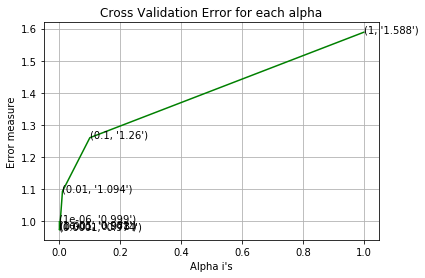

For values of best alpha =  0.0001 The train log loss is: 0.3930082453872046
For values of best alpha =  0.0001 The cross validation log loss is: 0.9737114832402982
For values of best alpha =  0.0001 The test log loss is: 0.9804153785680809
Log loss : 0.9804153785680809
Number of mis-classified points : 0.3398496240601504
-------------------- Confusion matrix --------------------


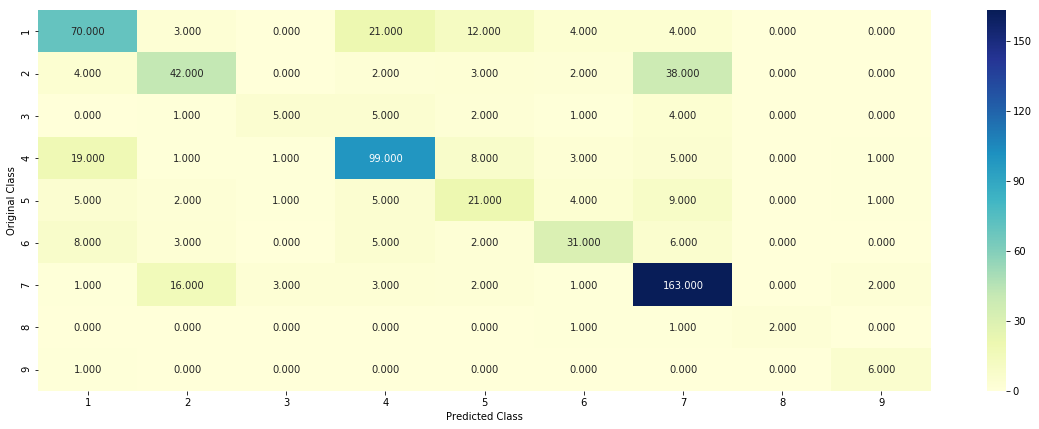

-------------------- Precision matrix (Columm Sum=1) --------------------


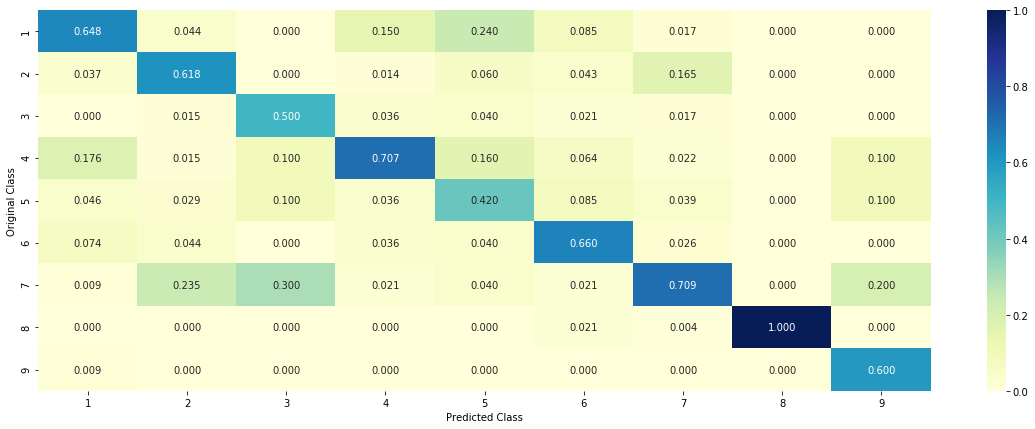

-------------------- Recall matrix (Row sum=1) --------------------


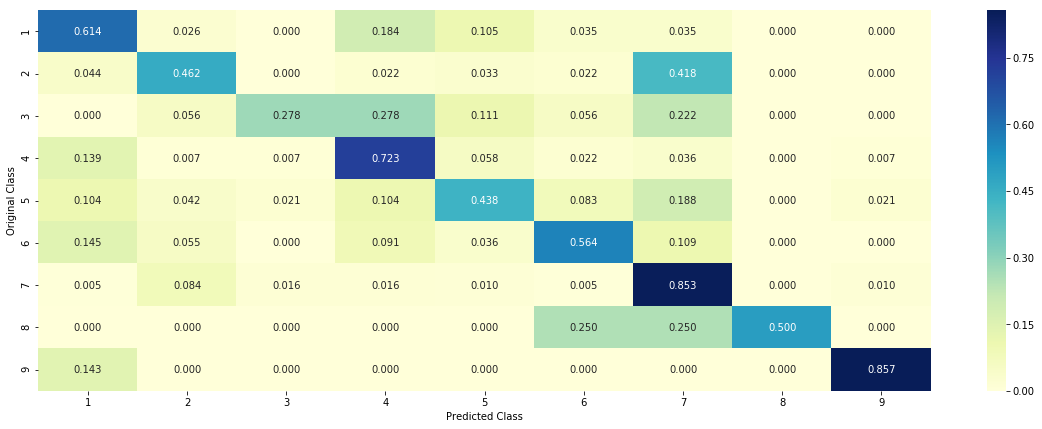

In [66]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("For alpha = ", i,"Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train, test_x_onehotCoding, y_test, clf)

In [68]:
from prettytable import PrettyTable

In [69]:
table1 = PrettyTable()
table2 = PrettyTable()
table3 = PrettyTable()
table4 = PrettyTable()

In [70]:
table1.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table1.add_row(['Naive Bayes',0.848,1.188,1.161])
table1.add_row(['KNN',0.660,1.032,1.043])
table1.add_row(['LR - class balanced',0.632,1.103,1.051])
table1.add_row(['LR -class imbalanced',0.622,1.105,1.055])
table1.add_row(['SVM',0.795,1.311,1.284])
table1.add_row(['RF',1.036,1.278,1.228])
table1.add_row(['Stacked models',0.798, 1.209,1.183])
print("TFIDF with top 1000 features")
print(table1)
print('\n')

table2.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table2.add_row(['LR',0.472,1.113,1.0371])
print("Countvectorizer with unigram and bigram features")
print(table2)
print('\n')
table3.field_names = ['Model', 'Train Los', 'Test Loss', 'CV Loss']
table3.add_row(['LR',0.701,1.018,1.082])
print("Feature Engineering with Max Feature for Text as 2000 and variation as 200")
print(table3)
print('\n')
print("Feature Engineering with Max Feature for Text as 1000 and variation as 50")
table4.field_names = ['Model', 'Train Los', 'Test Loss', 'CV Loss']
table4.add_row(['LR',0.709,1.005,1.092])
table4.add_row(['RF',0.906,1.183,1.223])
table4.add_row(['KNN', 0.947,1.153,1.216])
print(table4)
print('\n')
print("Feature Engineering with 4gram for TEXT and unigram for Gene and Variation using Countvectorizer")
table5 = PrettyTable()
table5.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table5.add_row(['LR',0.829,1.041,1.162])
table5.add_row(['RF',1.122,1.249,1.326])
table5.add_row(['KNN', 1.020,1.235,1.316])
print(table5)
print('\n')
print("Feature Engineering with Bigram for TEXT and unigram for Gene and Variation using Countvectorizer")
table6 = PrettyTable()
table6.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table6.add_row(['LR',0.697,1.014,1.095])
table6.add_row(['RF',0.795,1.165,1.206])
table6.add_row(['KNN', 0.990,1.216,1.286])
print(table6)
print('\n')
print("Feature Engineering with 1000 Bigram and 1000 4-gram features of TEXT and unigram for gene and variation feature")
table7 = PrettyTable()
table7.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table7.add_row(['LR',0.752,1.028,1.116])
table7.add_row(['RF',0.786,1.174,1.209])
table7.add_row(['KNN', 0.998,1.186,1.272])
print(table7)
print('\n')
print("Feature Engineering with bigram features using TFIDF")
table8 = PrettyTable()
table8.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table8.add_row(['LR',0.606,1.144,1.025])
print(table8)
print('\n')
print("Feature Engineering by combining Gene and Variation features")
table9 = PrettyTable()
table9.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table9.add_row(['LR',0.440,1.206,1.041])
table9.add_row(['RF',0.623,1.182,1.115])
print(table9)
print('\n')
print("Feature Engineering by combining Gene and Variation features and Creating New features")
table10 = PrettyTable()
table10.field_names = ['Model', 'Train Loss', 'Test Loss', 'CV Loss']
table10.add_row(['LR',0.3930,0.9737,0.9804])

print(table10)
print('\n')

TFIDF with top 1000 features
+----------------------+------------+-----------+---------+
|        Model         | Train Loss | Test Loss | CV Loss |
+----------------------+------------+-----------+---------+
|     Naive Bayes      |   0.848    |   1.188   |  1.161  |
|         KNN          |    0.66    |   1.032   |  1.043  |
| LR - class balanced  |   0.632    |   1.103   |  1.051  |
| LR -class imbalanced |   0.622    |   1.105   |  1.055  |
|         SVM          |   0.795    |   1.311   |  1.284  |
|          RF          |   1.036    |   1.278   |  1.228  |
|    Stacked models    |   0.798    |   1.209   |  1.183  |
+----------------------+------------+-----------+---------+


Countvectorizer with unigram and bigram features
+-------+------------+-----------+---------+
| Model | Train Loss | Test Loss | CV Loss |
+-------+------------+-----------+---------+
|   LR  |   0.472    |   1.113   |  1.0371 |
+-------+------------+-----------+---------+


Feature Engineering with Max Feat

# Conclusion:

- Logistic Regession with additional new created features gave the best performace.
- Various other Feature Engineering Techniques were applied giving reasonable performance.
- Logistic Regression perfomed the best among all the other models. 

# Procedure:

- We have loaded/readed the data into pandas dataframe
- Found that some special char, multiple space b/w words so used text preprocessing/data cleaning
- Did EDA for better understanding of data and found that some insights out of it although It is medical data and for better understanding of data we need to have some good knowledge in molecular biology or to be more specific domain knowledge.
- Extracted some feature out of text data as well as from the others features(Gene, Variation) also and did some visualization to understand whether it has some value or not.
- We have also checked for distribution of the class labels among train,test, and validation data.
- After this, built a random model and generated 9 class probability randomely such that they sum to 1 to ensure that whatever model we built on top of this the loss will be always less and got log-loss ~2.5 from this random model.
- Featurized categorical feature into numerical using onehotencoding and response coding and used both featurized vector to predict class label.
- We also build other models with each and every individual engineered feature and checked whether they will be helpful or not in prediction and found that they are helpful.
    On the text features we have used tfidf and choose top 1k features and then stacked all the features on top of each other.
- We then tried various ML models to find the class label.
- We next tried featurizing the gene, variation and text using counvectorizer with unigram and bigram features and applied Logistic Regression model to it.
- Next, we tried different featurization to improve the log loss of test and cv data.

# END